# PROBLEM STATEMENT:
    
    Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is         problematic for companies. HR professionals often assume a leadership role in designing company compensation programs,    
    work  culture, and motivation systems that help the organization retain top employees.How does Attrition affect companies?  and how does HR Analytics help in analyzing attrition ? 

  


# DEFINING THE NATURE OF PROBLEM

  Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# ROLE OF HR

- HR Analytics
 - Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to     the human resource department of an organization in the hope of improving employee performance and therefore getting a better   return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to           provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these     processes

# DEFINING ATTRITION
- Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employe

# IMPORTING ALL THE REQUIRED LIBRARIES

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import missingno as ms

import warnings
warnings.filterwarnings('ignore')

In [300]:
#importing file
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# ANALYZING THE NATURE OF RAW DATA

In [301]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [302]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [304]:
print('THE NUMBER OF ROWS AND COLUMN ARE: ',df.shape)

THE NUMBER OF ROWS AND COLUMN ARE:  (1470, 35)


In [305]:
df2=df.select_dtypes(include="object").head()
df2

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes  
3     Research Scientist       Married      Y      Yes  
4  Laboratory Technician       Married      Y       No

In [306]:
df1 = df.select_dtypes(exclude="object")
df1.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 26 columns]

In [307]:
#OBSERVATION:
     

In [308]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [309]:
df.notnull().sum()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

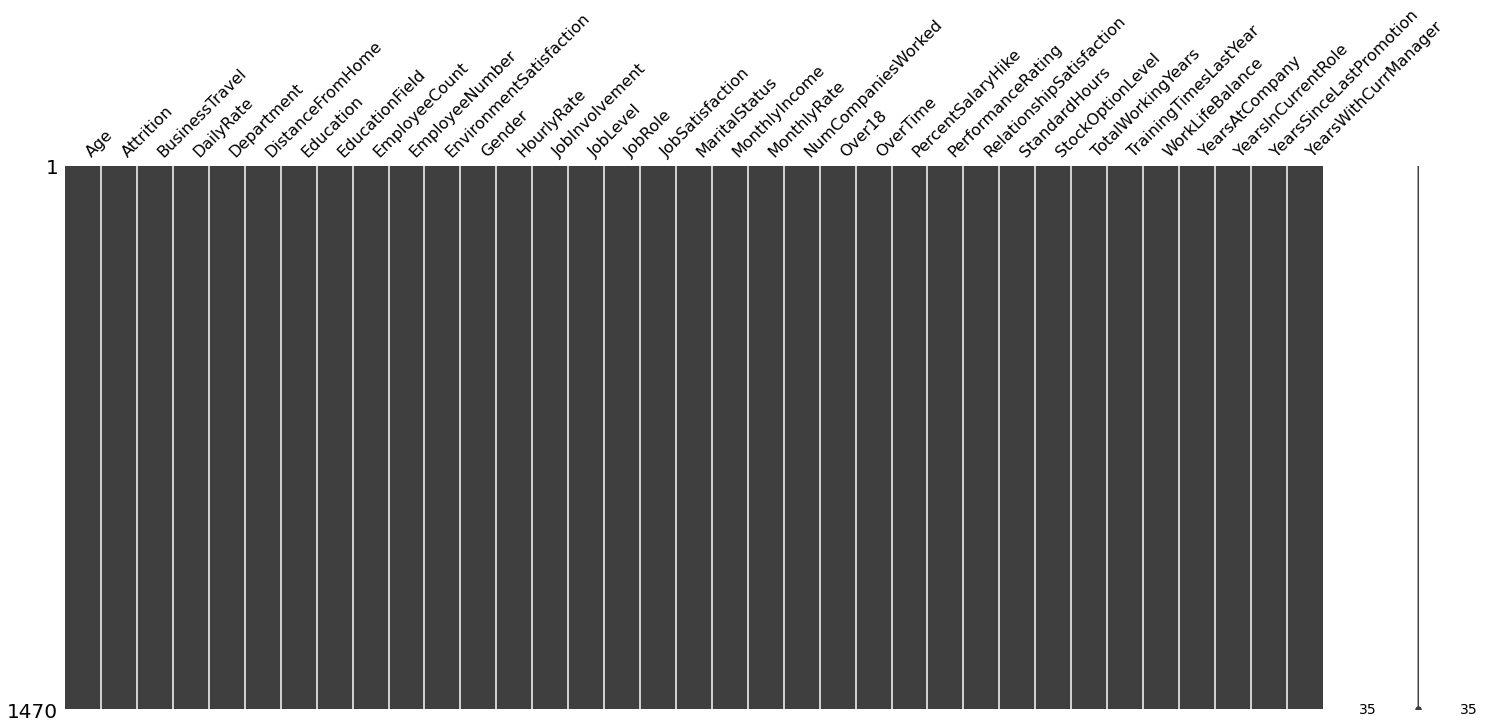

In [310]:
#plotting missing number confirmation

ms.matrix(df);

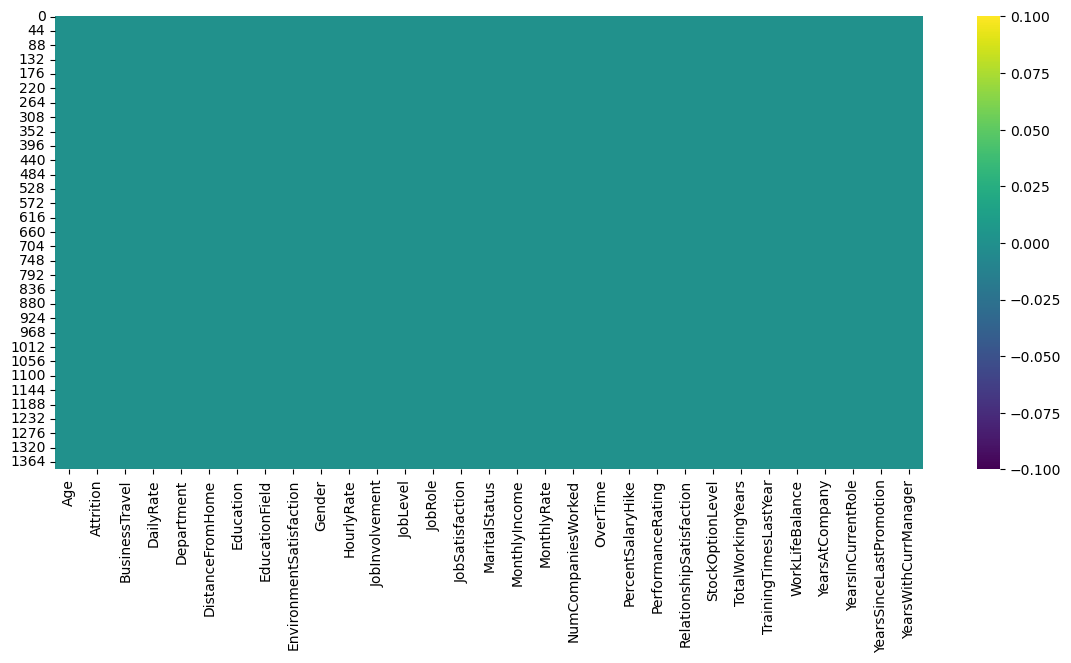

In [573]:
plt.figure(figsize=(14,6),dpi=100)
sns.heatmap(df.isna(),cmap='viridis');

In [312]:
#OBSERVATION:

In [313]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [314]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [315]:
df.loc[:, df.nunique() == 1]

EmployeeCount Over18  StandardHours
0                 1      Y             80
1                 1      Y             80
2                 1      Y             80
3                 1      Y             80
4                 1      Y             80
...             ...    ...            ...
1465              1      Y             80
1466              1      Y             80
1467              1      Y             80
1468              1      Y             80
1469              1      Y             80

[1470 rows x 3 columns]

In [316]:
df.describe(include='O')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

In [317]:
#observation

# ANALYSING THE NUMERICAL AND OBJECT COLUMN SEPARETELY

# 1. CATEGORICAL COLUMNS

In [318]:
#TARGET COLUMN(ATTRITION)

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

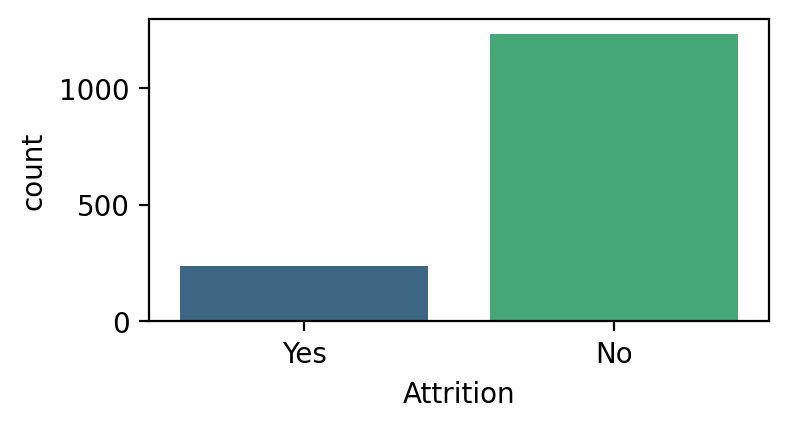

In [319]:

plt.figure(figsize=(4,2),dpi=200)
sns.countplot(df['Attrition'],palette='viridis')

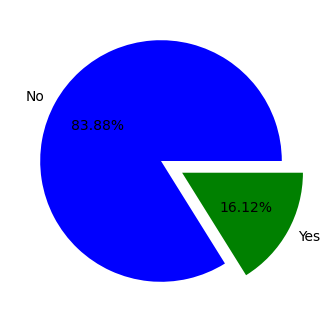

In [320]:
labels = ['No','Yes']
fig, ax = plt.subplots(dpi=100)
cl = ['blue','green']
plt.legend
exp = [0.0,0.2]
plt.pie(df['Attrition'].value_counts(),labels = labels,explode = exp,radius =1, autopct = '%1.2f%%', shadow=False,colors=cl)
plt.show()

In [321]:
#BusinessTravel
df['BusinessTravel'].value_counts()


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

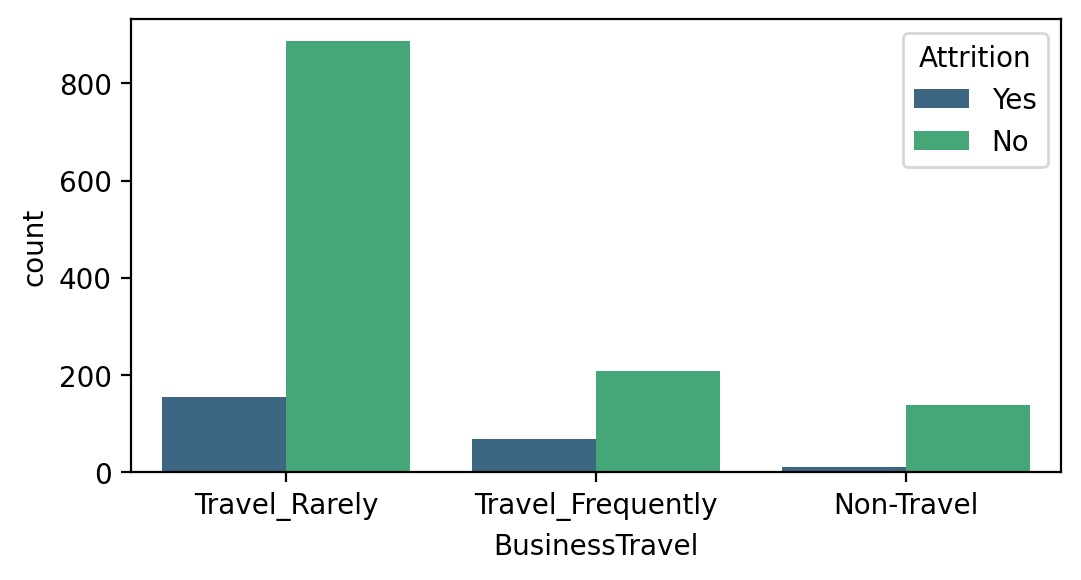

In [322]:
plt.figure(figsize=(6,3),dpi=200)
sns.countplot(data=df,x='BusinessTravel',hue='Attrition',palette='viridis');

In [323]:
#Department
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

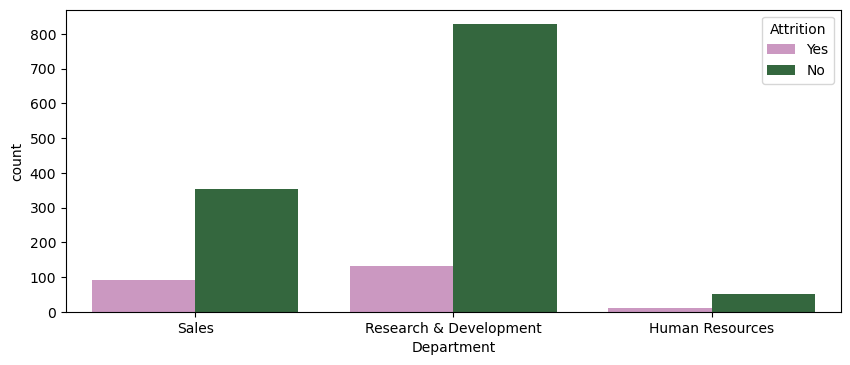

In [324]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(data=df,x='Department',hue='Attrition',palette='cubehelix_r');

In [325]:
#EducationField
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

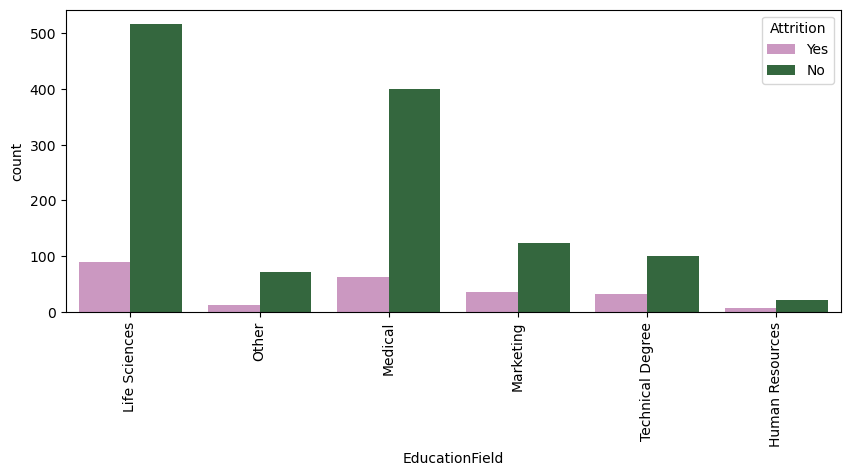

In [326]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(data=df,x='EducationField',hue='Attrition',palette='cubehelix_r')
plt.xticks(rotation=90);

In [327]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

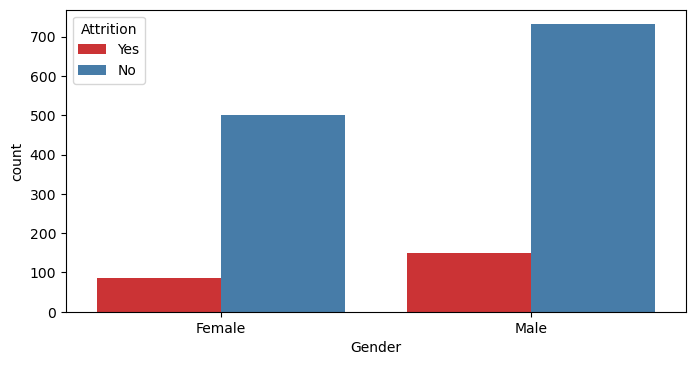

In [328]:
plt.figure(figsize=(8,4),dpi=100)
sns.countplot(data=df,x='Gender',hue='Attrition',palette='Set1')


In [329]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

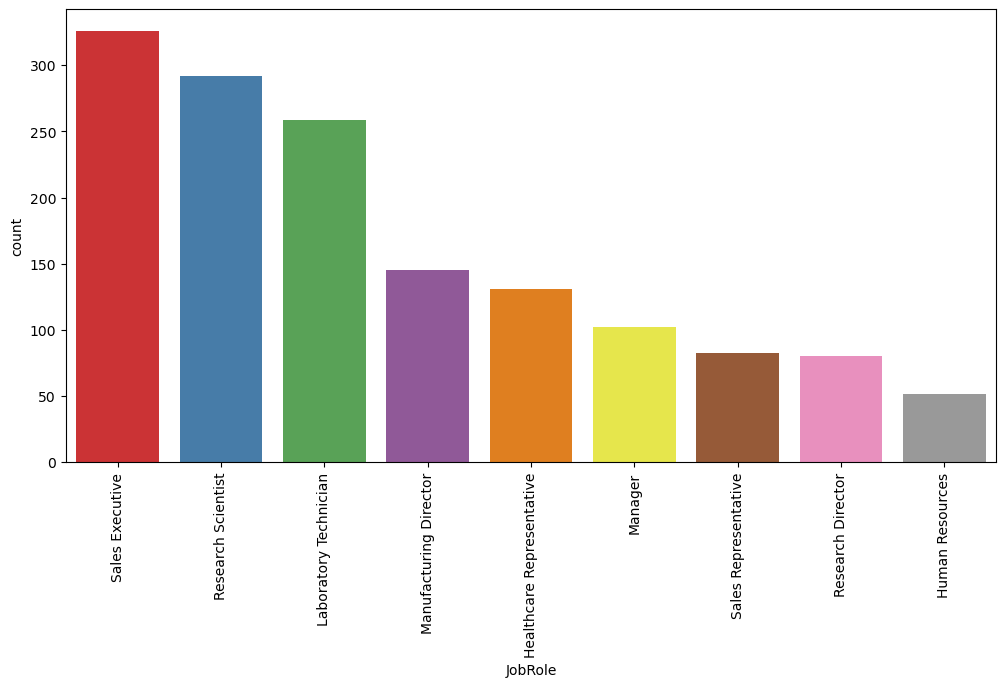

In [330]:
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=df,x='JobRole',palette='Set1')
plt.xticks(rotation=90);

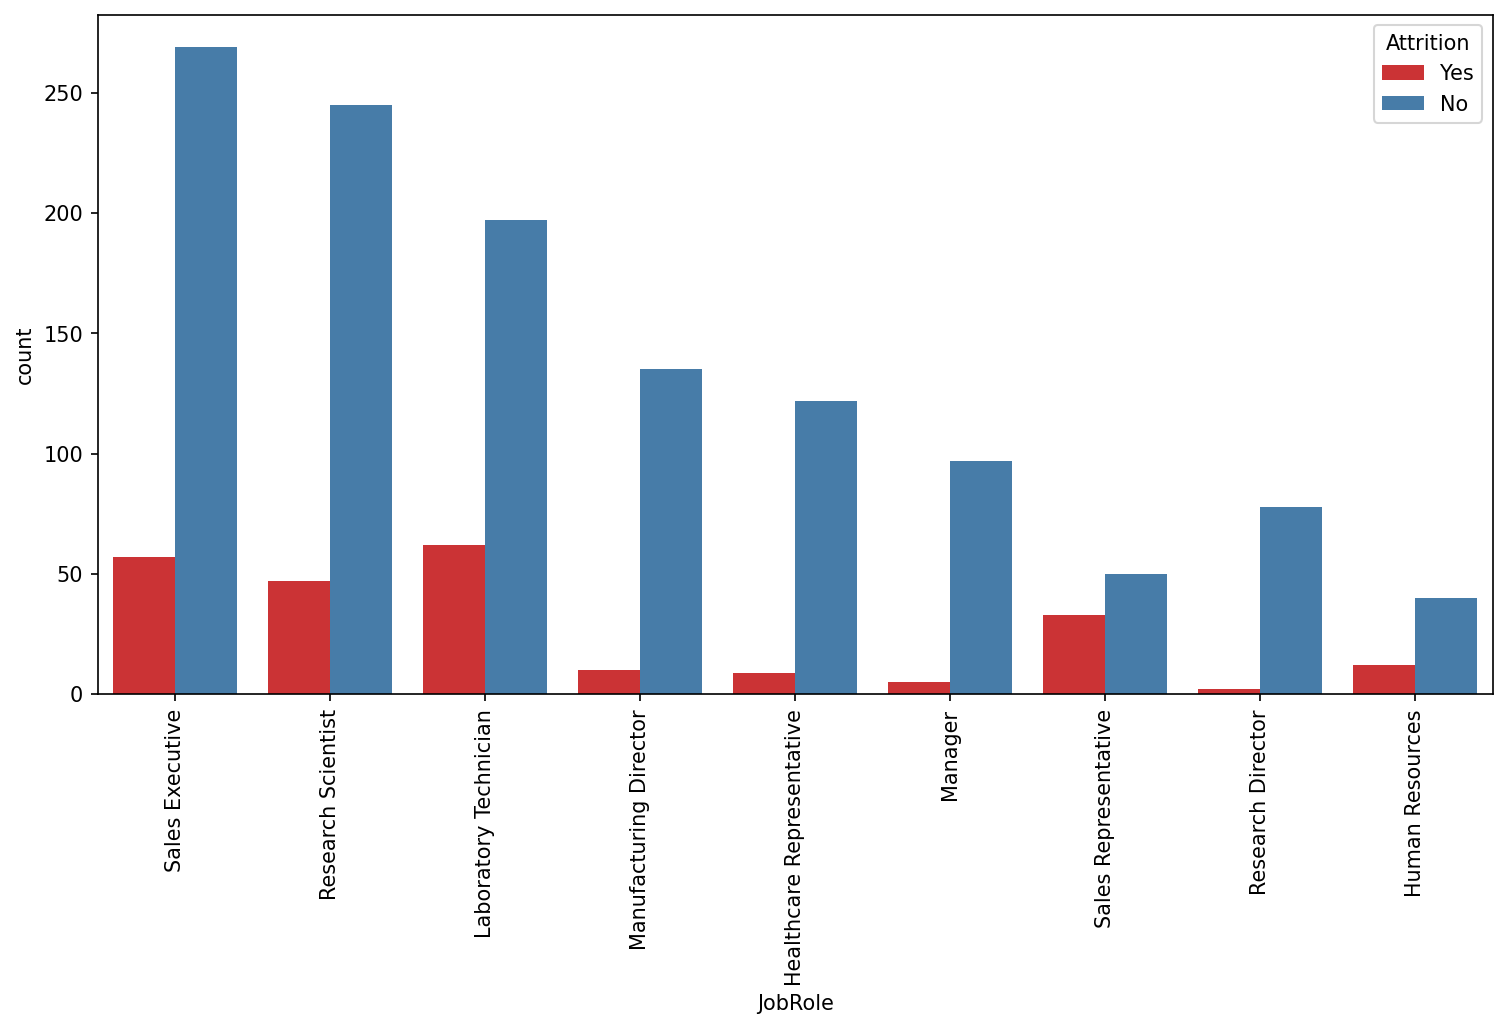

In [331]:
plt.figure(figsize=(12,6),dpi=150)
sns.countplot(data=df,x='JobRole',hue='Attrition',palette='Set1')
plt.xticks(rotation=90);


In [332]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

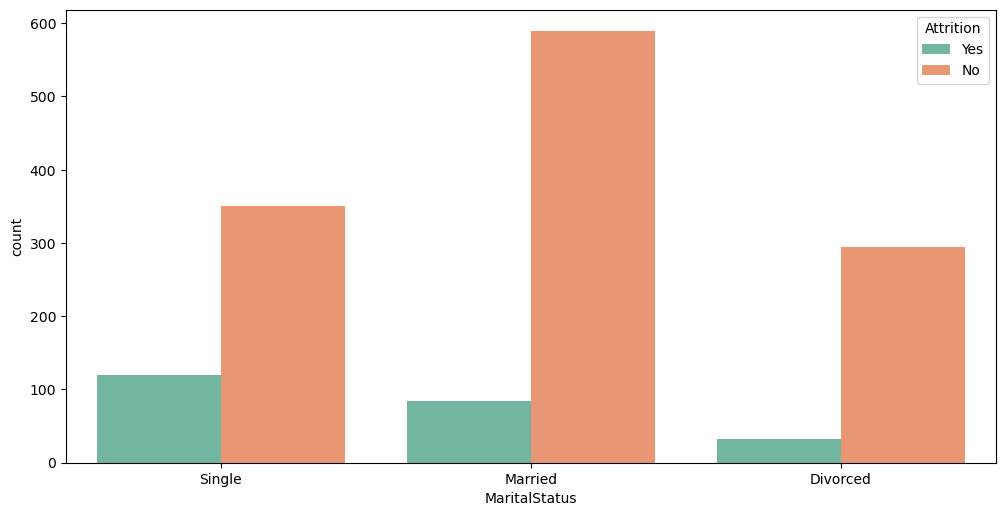

In [333]:
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=df,x='MaritalStatus',hue='Attrition',palette='Set2')


In [334]:
#overtime
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

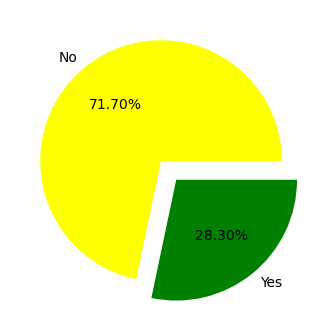

In [335]:
labels = ['No','Yes']
fig, ax = plt.subplots(dpi=100)
cl = ['yellow','green']
plt.legend
exp = [0.0,0.2]
plt.pie(df['OverTime'].value_counts(),labels = labels,explode = exp,radius =1, autopct = '%1.2f%%', shadow=False,colors=cl)
plt.show()

<AxesSubplot:xlabel='OverTime', ylabel='count'>

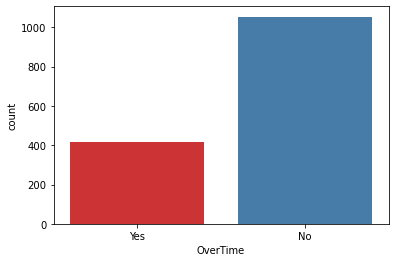

In [336]:
sns.countplot(df['OverTime'], palette="Set1")

# combining all above categorical plot in a single frame.

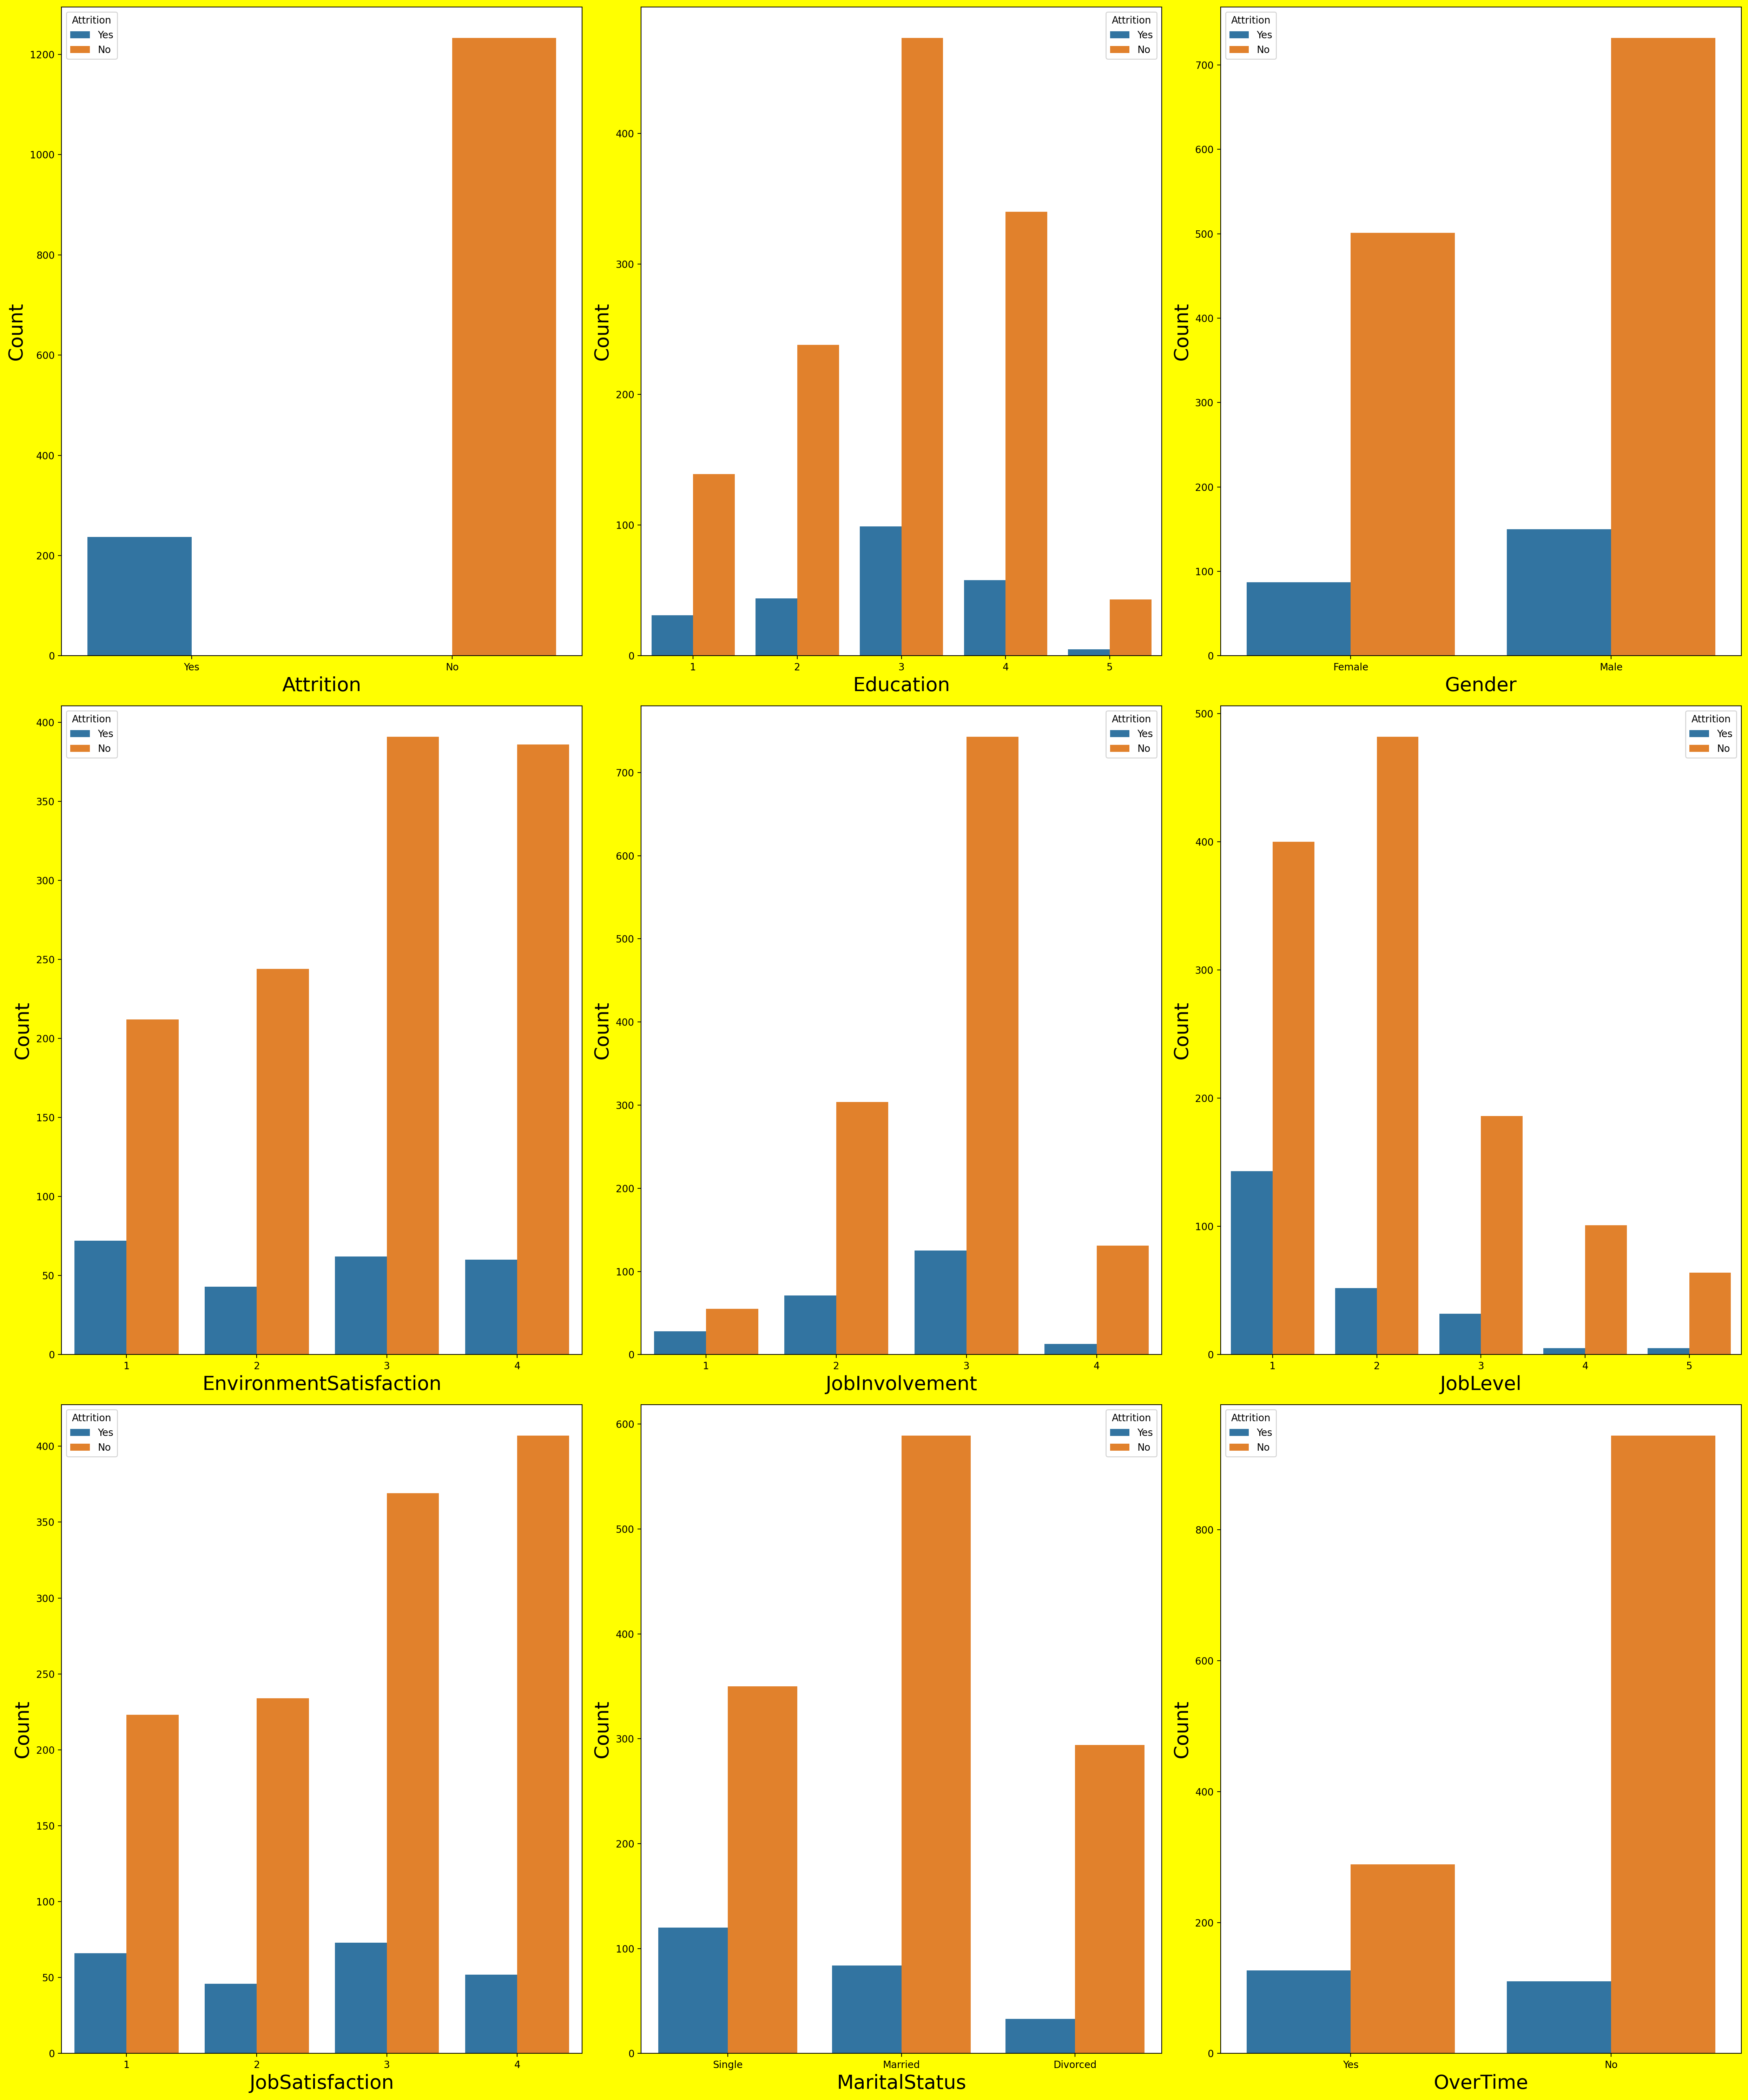

In [337]:
plt.figure(figsize=(25,30),facecolor='yellow',dpi=200)
plotnum=1
X = df[['Attrition','Education','Gender','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','OverTime']]
y = df['Attrition']
for col in X:
    if plotnum<=9:
        plt.subplot(3,3,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

# 2. NUMERICAL COLUMNS

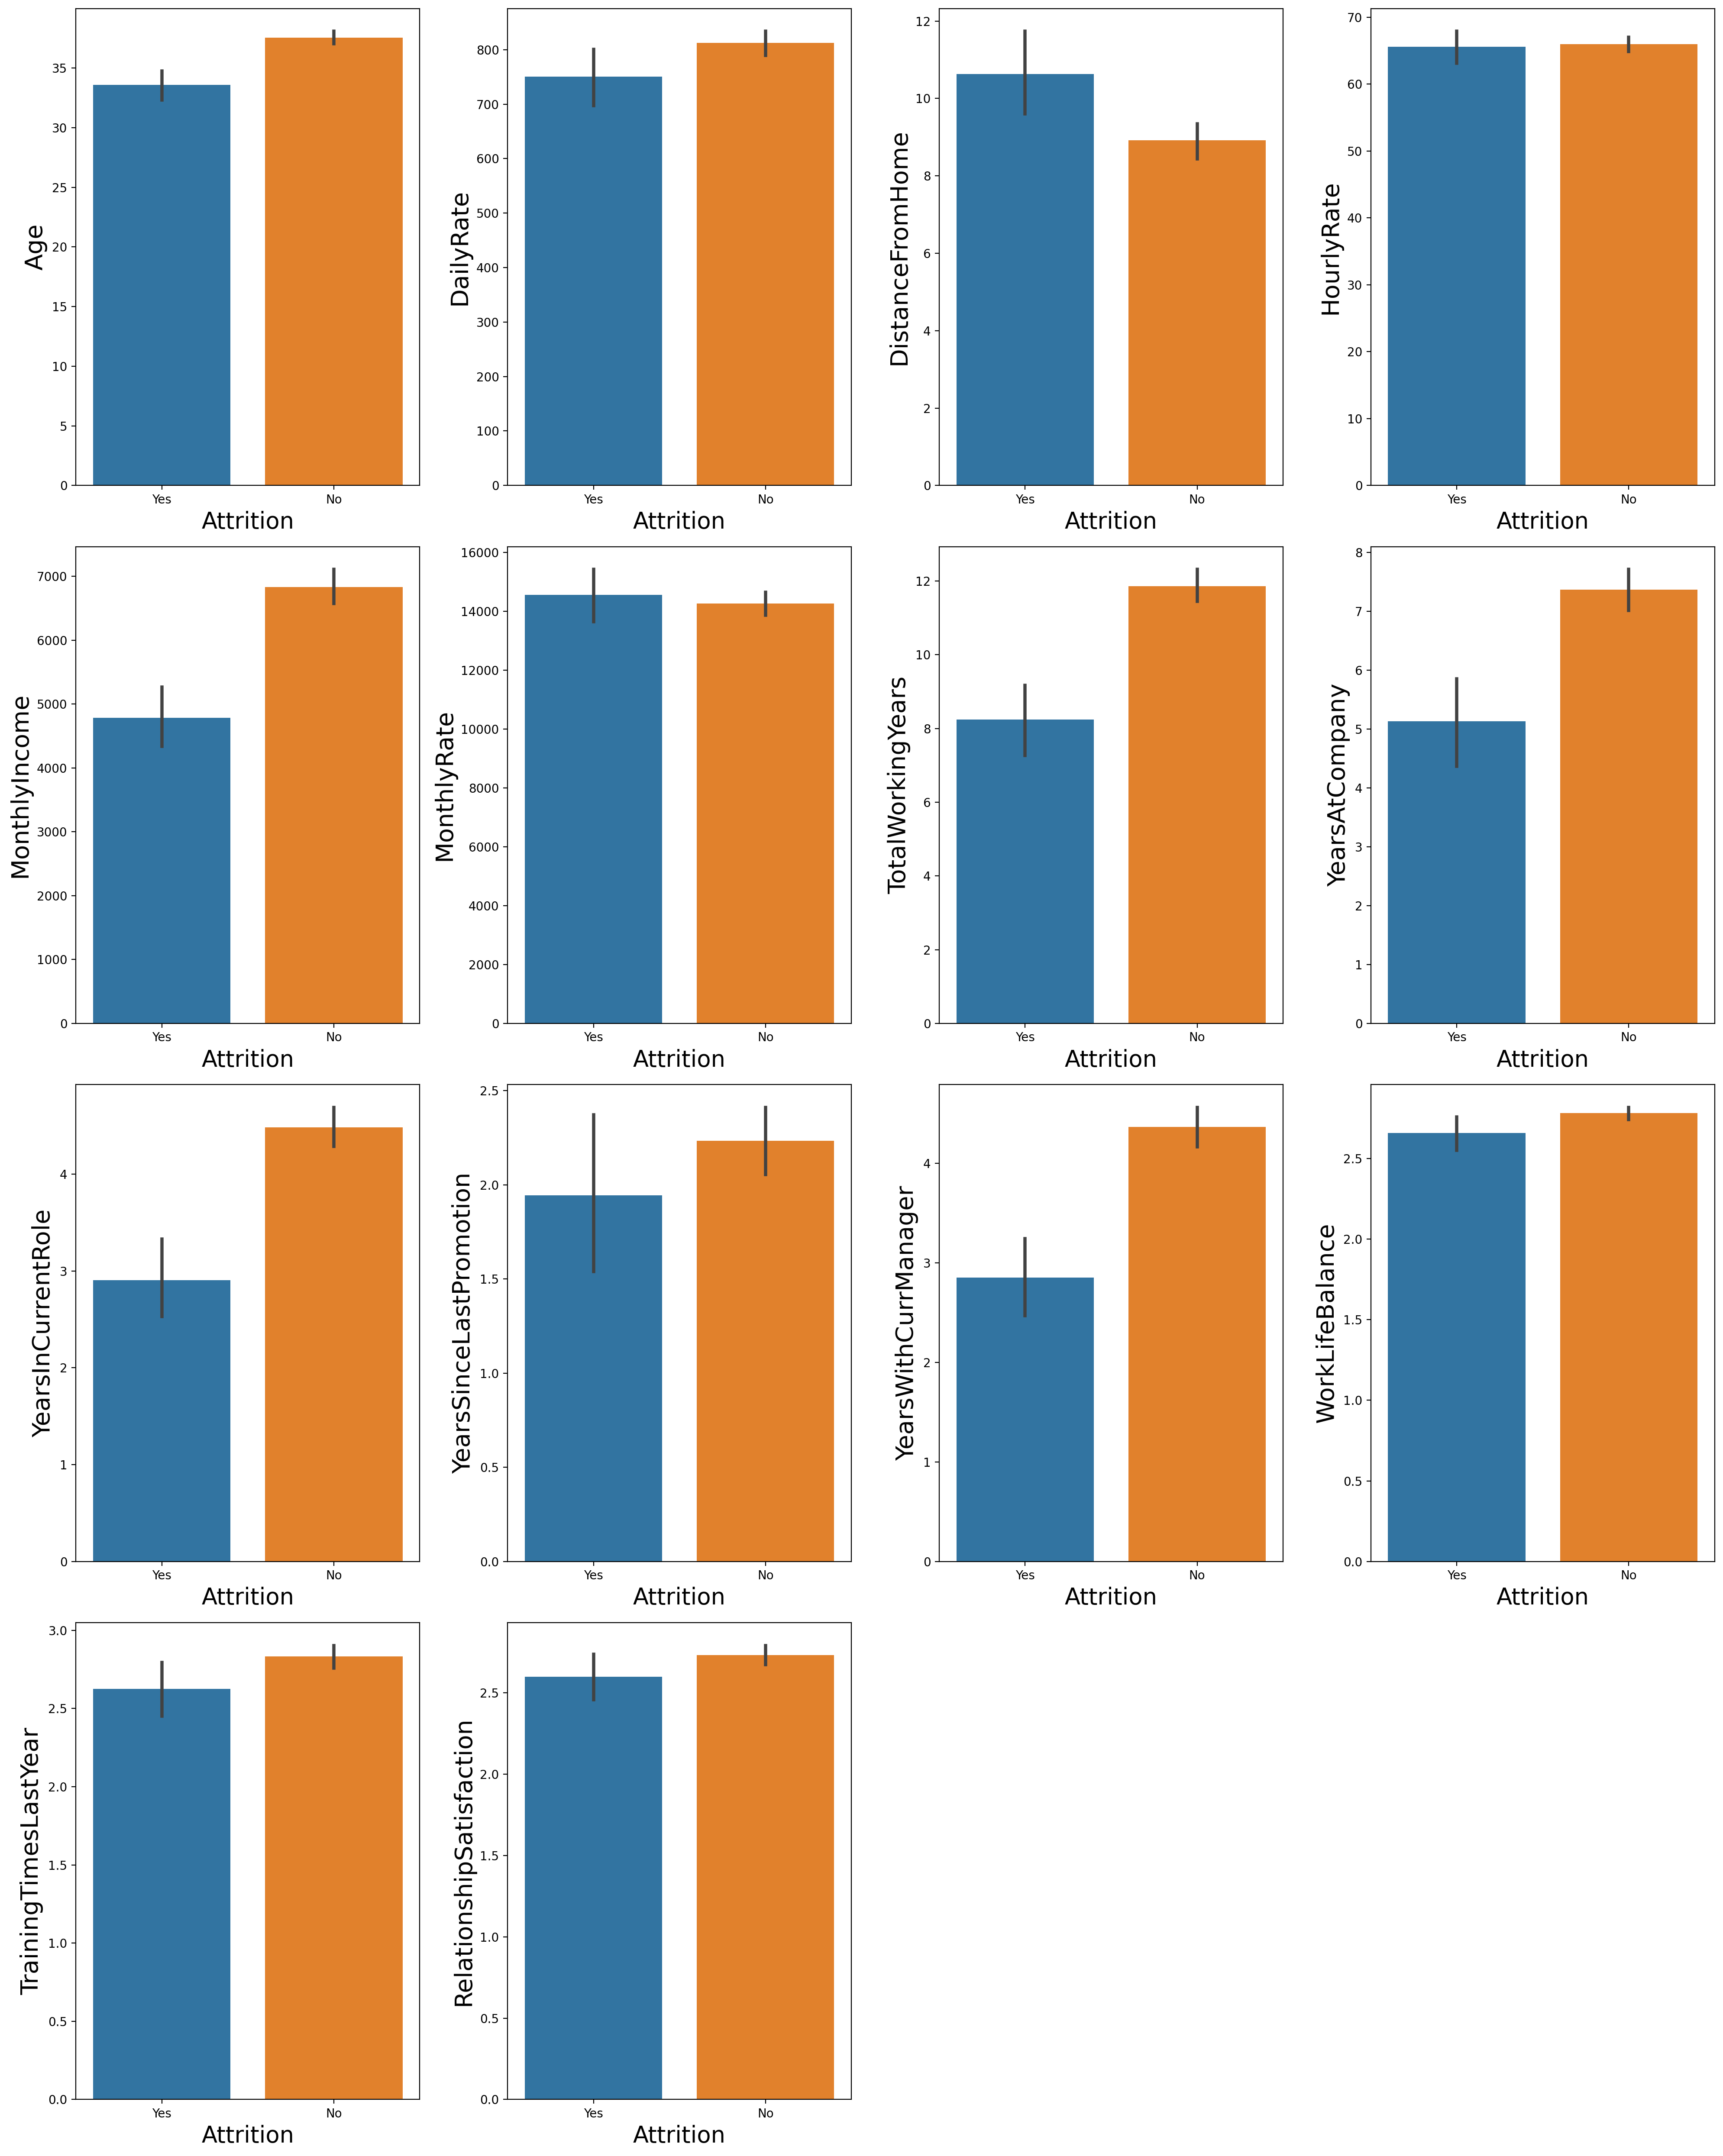

In [338]:
plt.figure(figsize=(20,25),facecolor='white',dpi=200)
plotnum=1
y = df['Attrition']
X = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
          'MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
          'YearsSinceLastPromotion','YearsWithCurrManager','WorkLifeBalance','TrainingTimesLastYear','RelationshipSatisfaction']]
for col in X:
    if plotnum<=15:
        plt.subplot(4,4,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Attrition',fontsize=19)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

In [339]:
#OBSERVATION

# ANALYSING IMPORTANT FEATURES WITH ATTRITION

<Figure size 2000x1200 with 0 Axes>

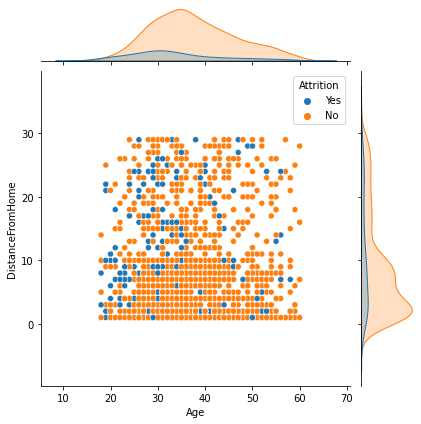

In [340]:
plt.figure(figsize=(10,6),dpi=200)
sns.jointplot(data=df,y='DistanceFromHome',x='Age',hue='Attrition')

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Gender'>

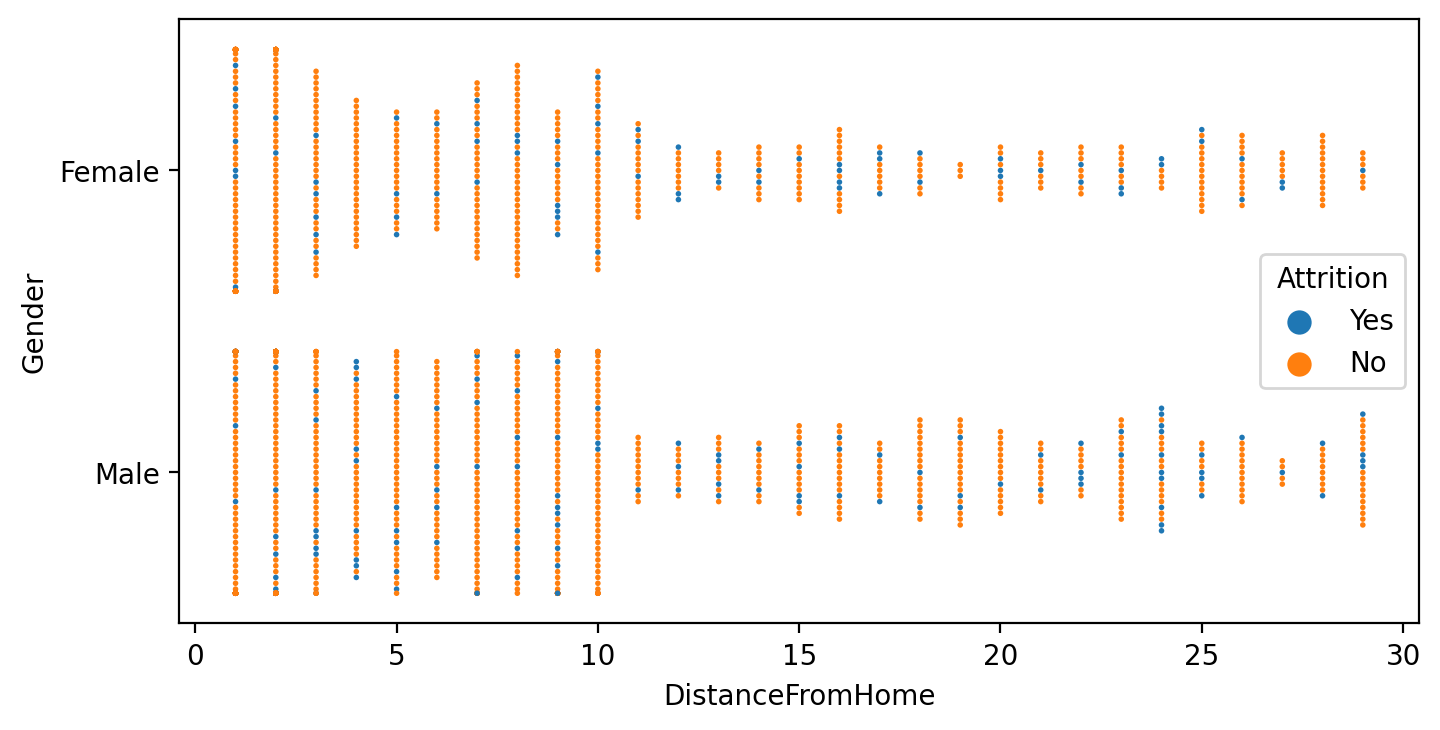

In [341]:
plt.figure(figsize=(8,4),dpi=200)
sns.swarmplot(data=df,x='DistanceFromHome',y='Gender',hue= 'Attrition',size=2)

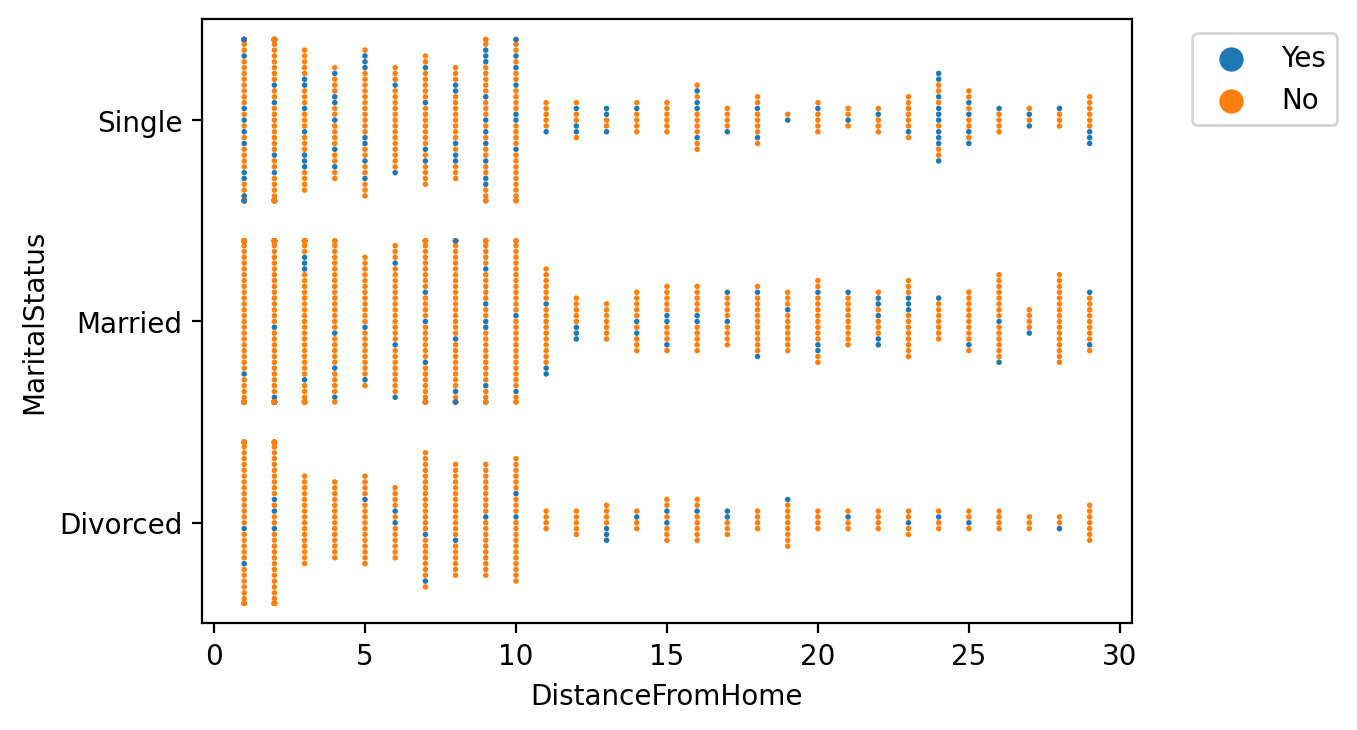

In [342]:
plt.figure(figsize=(6,4),dpi=200)
sns.swarmplot(data=df,x='DistanceFromHome',y='MaritalStatus',hue= 'Attrition',size=2)
plt.legend(bbox_to_anchor=(1.05,1))

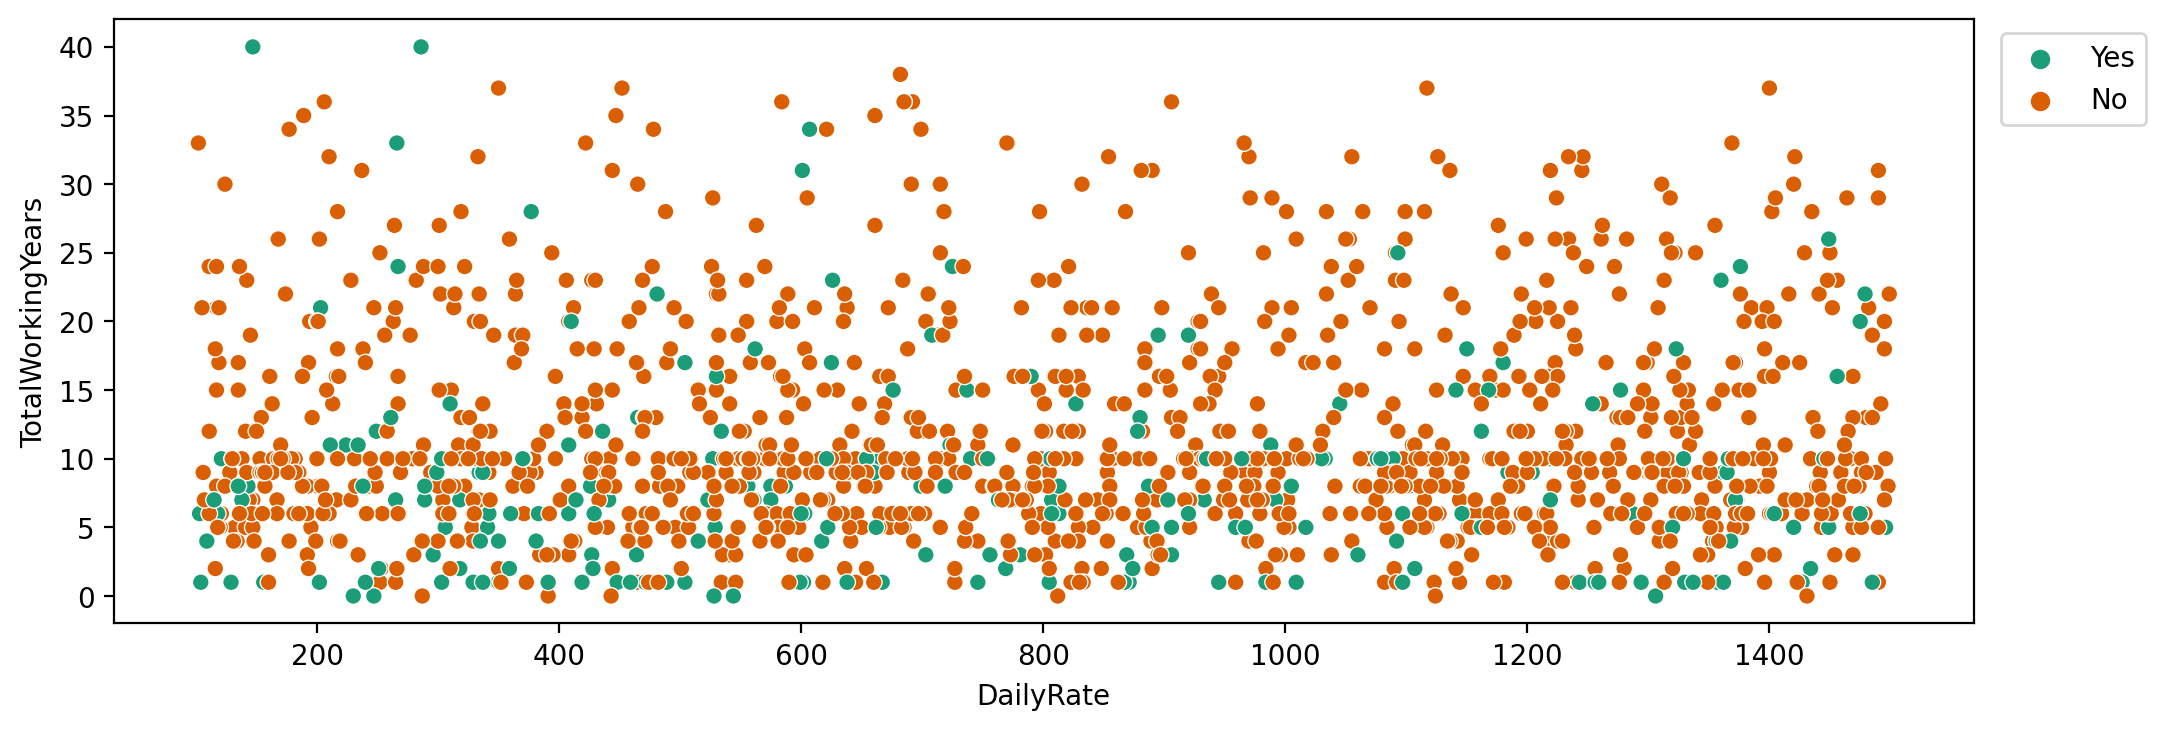

In [343]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x='DailyRate',y='TotalWorkingYears',data=df,hue='Attrition', palette='Dark2')
plt.legend(bbox_to_anchor=(1.1,1));              

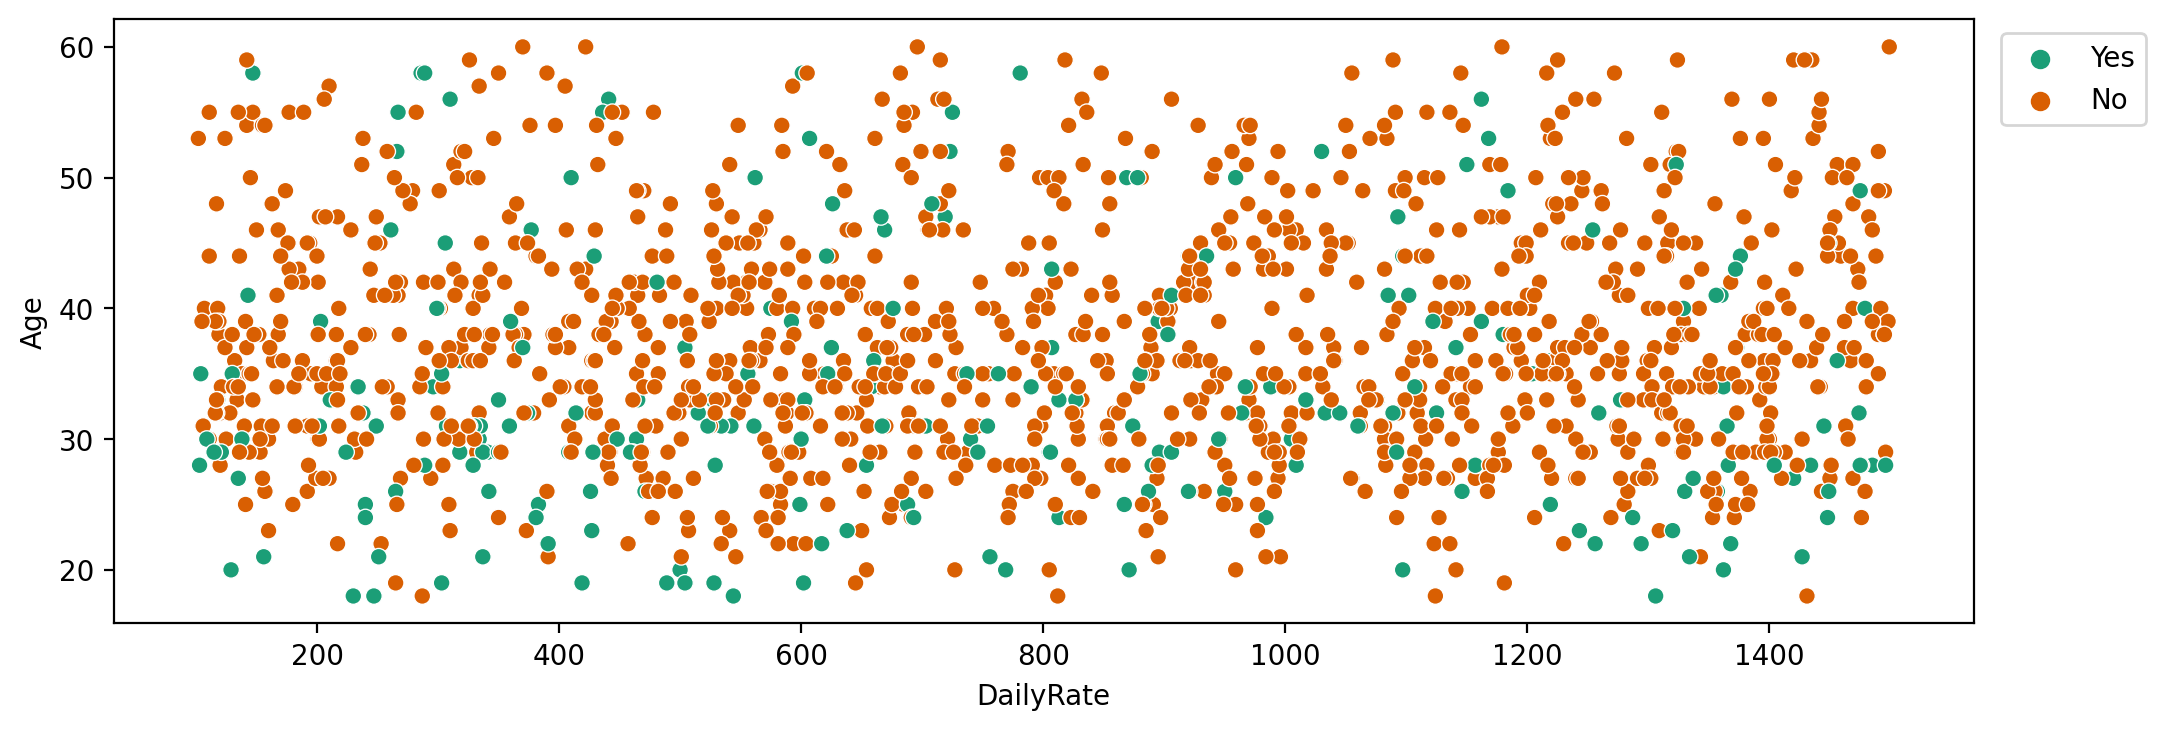

In [344]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x='DailyRate',y='Age',data=df,hue='Attrition', palette='Dark2')
plt.legend(bbox_to_anchor=(1.1,1));  

<AxesSubplot:xlabel='YearsAtCompany', ylabel='TotalWorkingYears'>

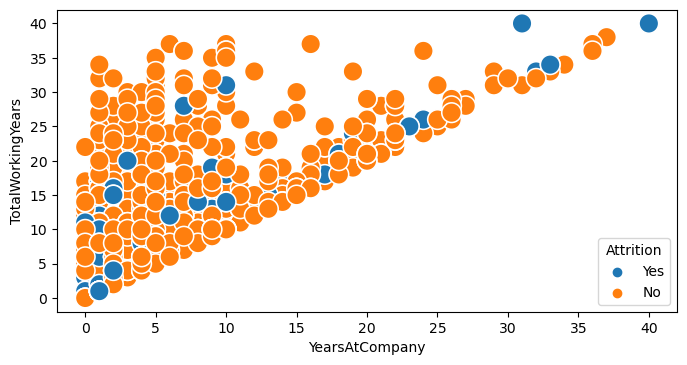

In [345]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(x='YearsAtCompany',y='TotalWorkingYears',data=df,s=200,alpha=1,
                hue='Attrition')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='WorkLifeBalance'>

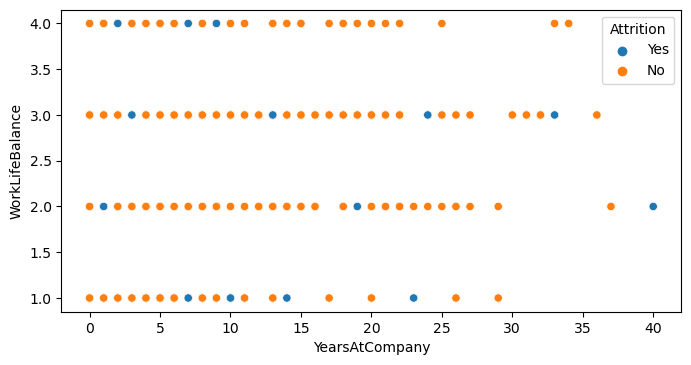

In [346]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(x='YearsAtCompany',y='WorkLifeBalance',data=df,
                hue='Attrition')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='WorkLifeBalance'>

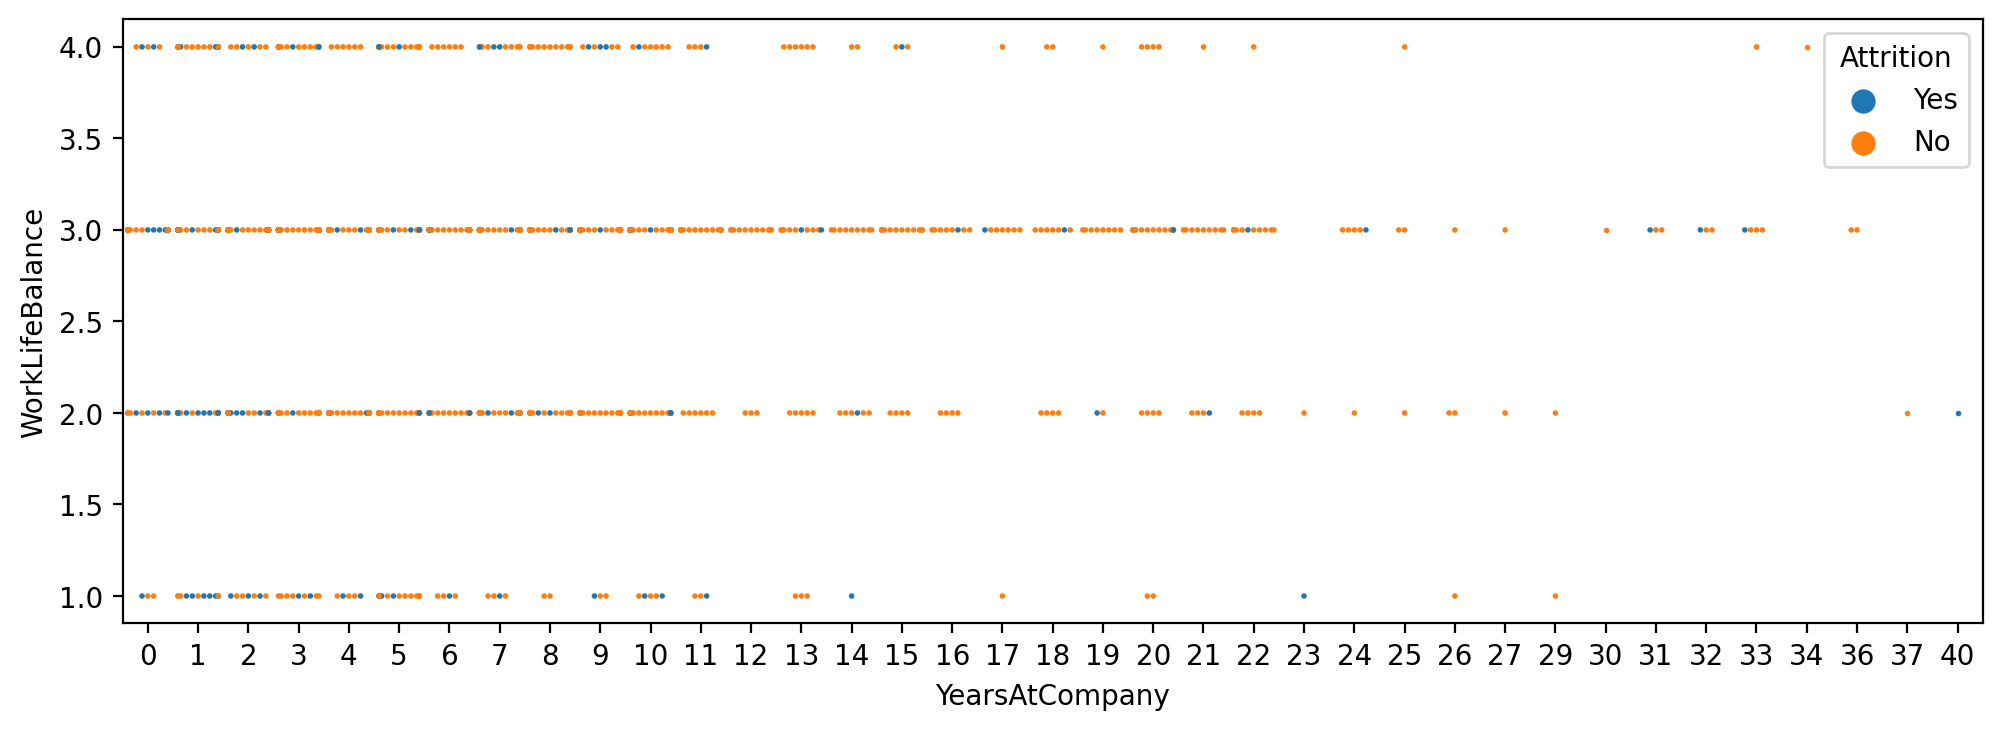

In [347]:
plt.figure(figsize=(12,4),dpi=200)
sns.swarmplot(data=df,x='YearsAtCompany',y='WorkLifeBalance',hue="Attrition",size=2)

In [348]:
#DETAIL OBSERVATION

#         #                      = =  = DATA CLEANING AND PROCESSING===

# CORRELATION AMONG FEATURES AND TARGETS

In [574]:
df.corr().head()

Age  Attrition  BusinessTravel  DailyRate  Department  \
Age             1.000000  -0.159366        0.022340   0.021946   -0.038242   
Attrition      -0.159366   1.000000       -0.001041  -0.057220    0.063637   
BusinessTravel  0.022340  -0.001041        1.000000  -0.004606   -0.003521   
DailyRate       0.021946  -0.057220       -0.004606   1.000000   -0.005398   
Department     -0.038242   0.063637       -0.003521  -0.005398    1.000000   

                DistanceFromHome  Education  EducationField  \
Age                    -0.011265   0.198502       -0.032676   
Attrition               0.081788  -0.032703        0.023585   
BusinessTravel         -0.032873  -0.010560        0.022576   
DailyRate              -0.008171  -0.018442        0.040645   
Department              0.023919   0.012846        0.013432   

                EnvironmentSatisfaction    Gender  ...  PerformanceRating  \
Age                            0.014098 -0.039430  ...          -0.000617   
Attrition                     -0.112393  0.036252  ...           0.010781   
BusinessTravel                 0.001183 -0.025364  ...          -0.018274   
DailyRate                      0.033123 -0.005242  ...           0.000574   
Department                    -0.014540 -0.030618  ...          -0.039364   

                RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Age                             0.041744          0.054506           0.636136   
Attrition                      -0.052344         -0.136676          -0.185619   
BusinessTravel                 -0.029660         -0.015159           0.029818   
DailyRate                       0.004516          0.048361           0.046173   
Department                     -0.037705         -0.003424          -0.016246   

                TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Age                         -0.019008        -0.016913        0.177620   
Attrition                   -0.057285        -0.062492       -0.166455   
BusinessTravel               0.010322        -0.014140       -0.027164   
DailyRate                    0.005861        -0.044266       -0.003580   
Department                   0.036092         0.026978        0.032583   

                YearsInCurrentRole  YearsSinceLastPromotion  \
Age                       0.121508                 0.103632   
Attrition                -0.171015                -0.029263   
BusinessTravel           -0.029257                -0.027283   
DailyRate                 0.022899                -0.043870   
Department                0.065536                 0.048931   

                YearsWithCurrManager  
Age                         0.121747  
Attrition                  -0.162297  
BusinessTravel             -0.044321  
DailyRate                  -0.011516  
Department                  0.034216  

[5 rows x 31 columns]

In [350]:
df.drop(columns = ['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True)

In [351]:
df.shape

(1470, 31)

In [575]:
df.corr().head()

Age  Attrition  BusinessTravel  DailyRate  Department  \
Age             1.000000  -0.159366        0.022340   0.021946   -0.038242   
Attrition      -0.159366   1.000000       -0.001041  -0.057220    0.063637   
BusinessTravel  0.022340  -0.001041        1.000000  -0.004606   -0.003521   
DailyRate       0.021946  -0.057220       -0.004606   1.000000   -0.005398   
Department     -0.038242   0.063637       -0.003521  -0.005398    1.000000   

                DistanceFromHome  Education  EducationField  \
Age                    -0.011265   0.198502       -0.032676   
Attrition               0.081788  -0.032703        0.023585   
BusinessTravel         -0.032873  -0.010560        0.022576   
DailyRate              -0.008171  -0.018442        0.040645   
Department              0.023919   0.012846        0.013432   

                EnvironmentSatisfaction    Gender  ...  PerformanceRating  \
Age                            0.014098 -0.039430  ...          -0.000617   
Attrition                     -0.112393  0.036252  ...           0.010781   
BusinessTravel                 0.001183 -0.025364  ...          -0.018274   
DailyRate                      0.033123 -0.005242  ...           0.000574   
Department                    -0.014540 -0.030618  ...          -0.039364   

                RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Age                             0.041744          0.054506           0.636136   
Attrition                      -0.052344         -0.136676          -0.185619   
BusinessTravel                 -0.029660         -0.015159           0.029818   
DailyRate                       0.004516          0.048361           0.046173   
Department                     -0.037705         -0.003424          -0.016246   

                TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Age                         -0.019008        -0.016913        0.177620   
Attrition                   -0.057285        -0.062492       -0.166455   
BusinessTravel               0.010322        -0.014140       -0.027164   
DailyRate                    0.005861        -0.044266       -0.003580   
Department                   0.036092         0.026978        0.032583   

                YearsInCurrentRole  YearsSinceLastPromotion  \
Age                       0.121508                 0.103632   
Attrition                -0.171015                -0.029263   
BusinessTravel           -0.029257                -0.027283   
DailyRate                 0.022899                -0.043870   
Department                0.065536                 0.048931   

                YearsWithCurrManager  
Age                         0.121747  
Attrition                  -0.162297  
BusinessTravel             -0.044321  
DailyRate                  -0.011516  
Department                  0.034216  

[5 rows x 31 columns]

<AxesSubplot:>

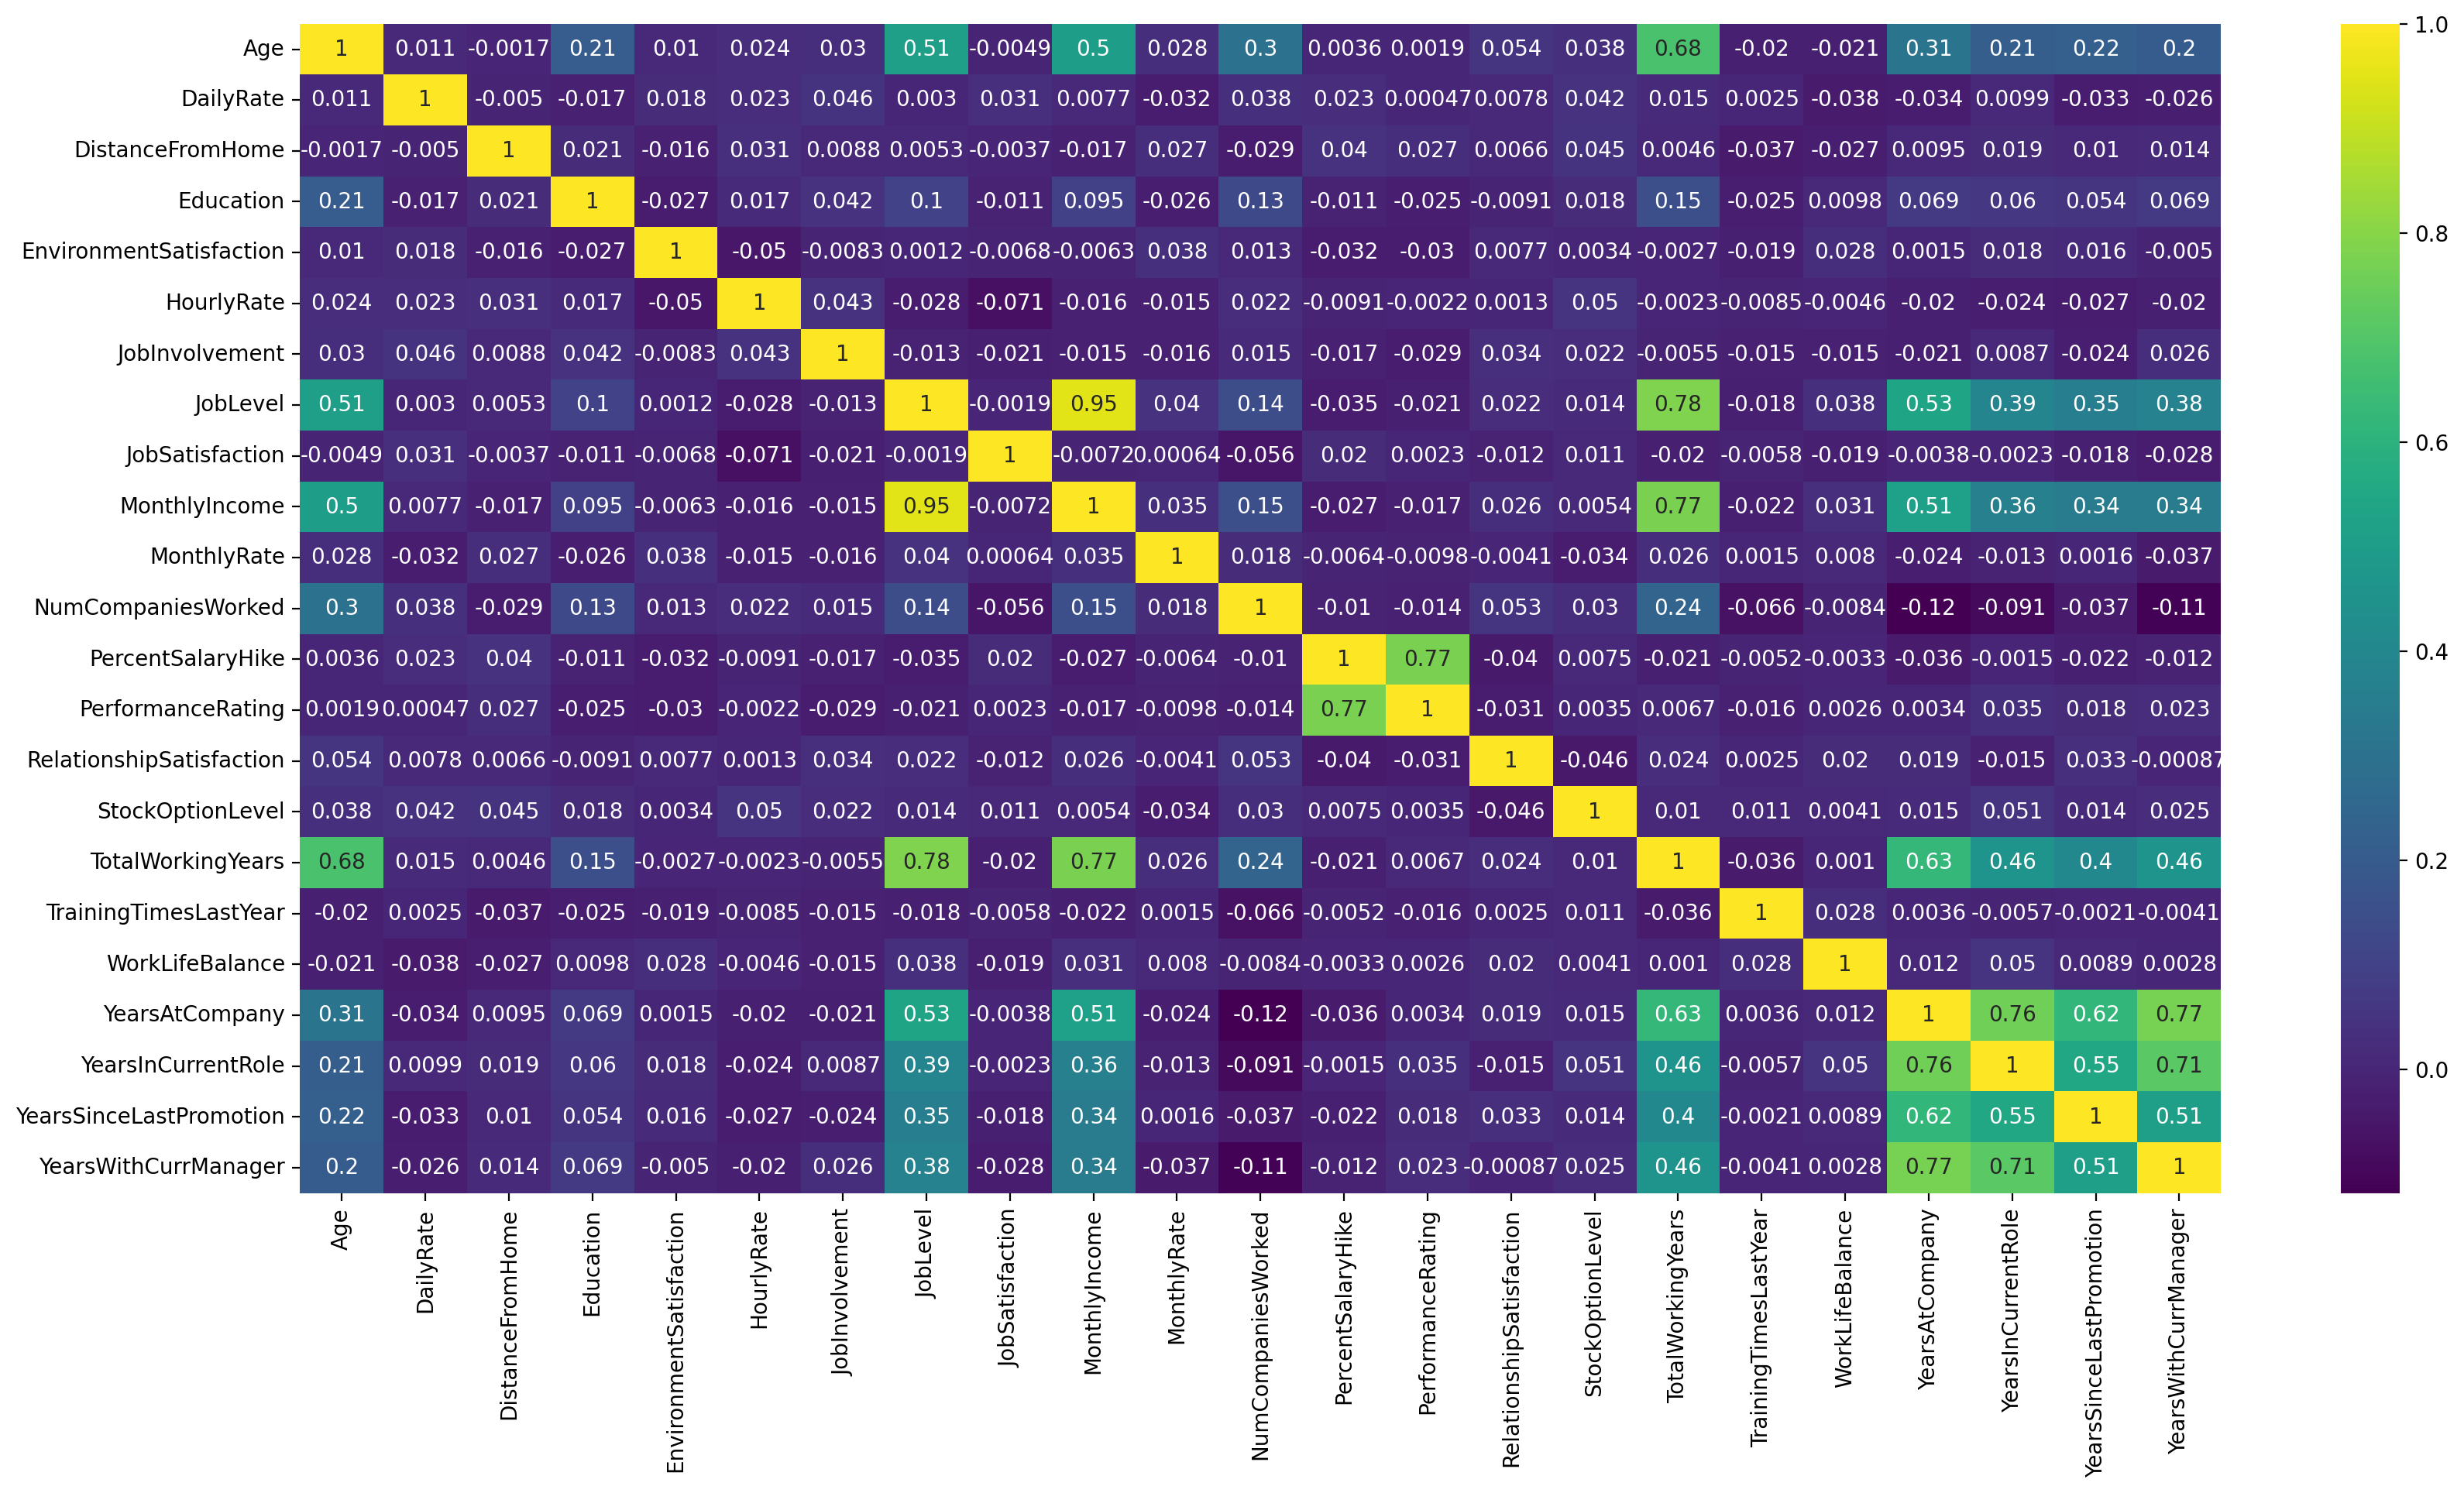

In [353]:
plt.figure(figsize = (20,10),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')
            

# strong relationship exists among total working years and job level,total working years and monthly income,years with curr manager and years at company and years in current role

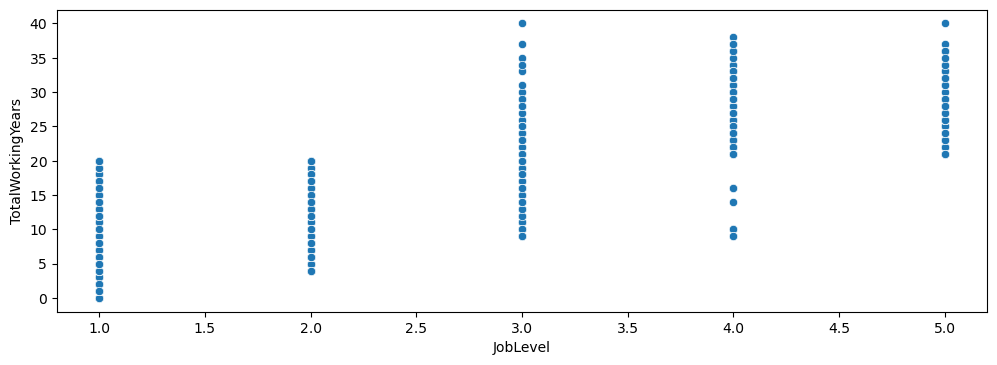

In [354]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(y='TotalWorkingYears',x='JobLevel',data=df,palette='Dark2');
               

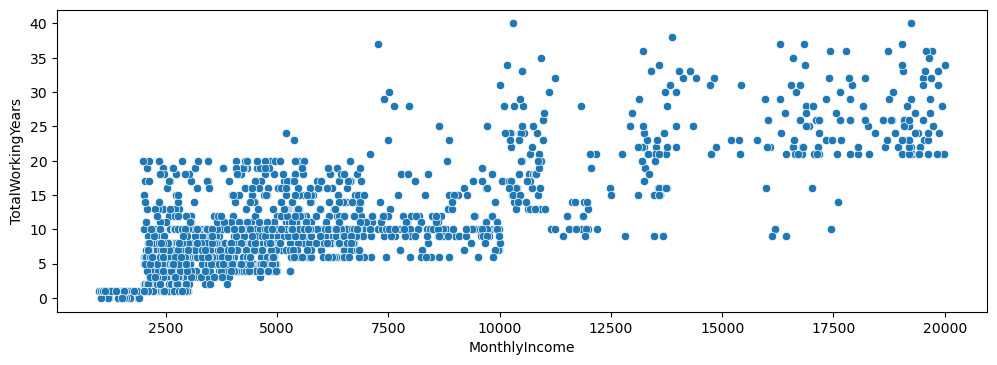

In [355]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(y='TotalWorkingYears',x='MonthlyIncome',data=df,palette='Dark2');
               

# NOW CHECKING FOR THE OUTLIERS

In [357]:
X = df.drop(columns = ['Attrition'])
y = df['Attrition']

# Identifying the Outliers with the Boxplot

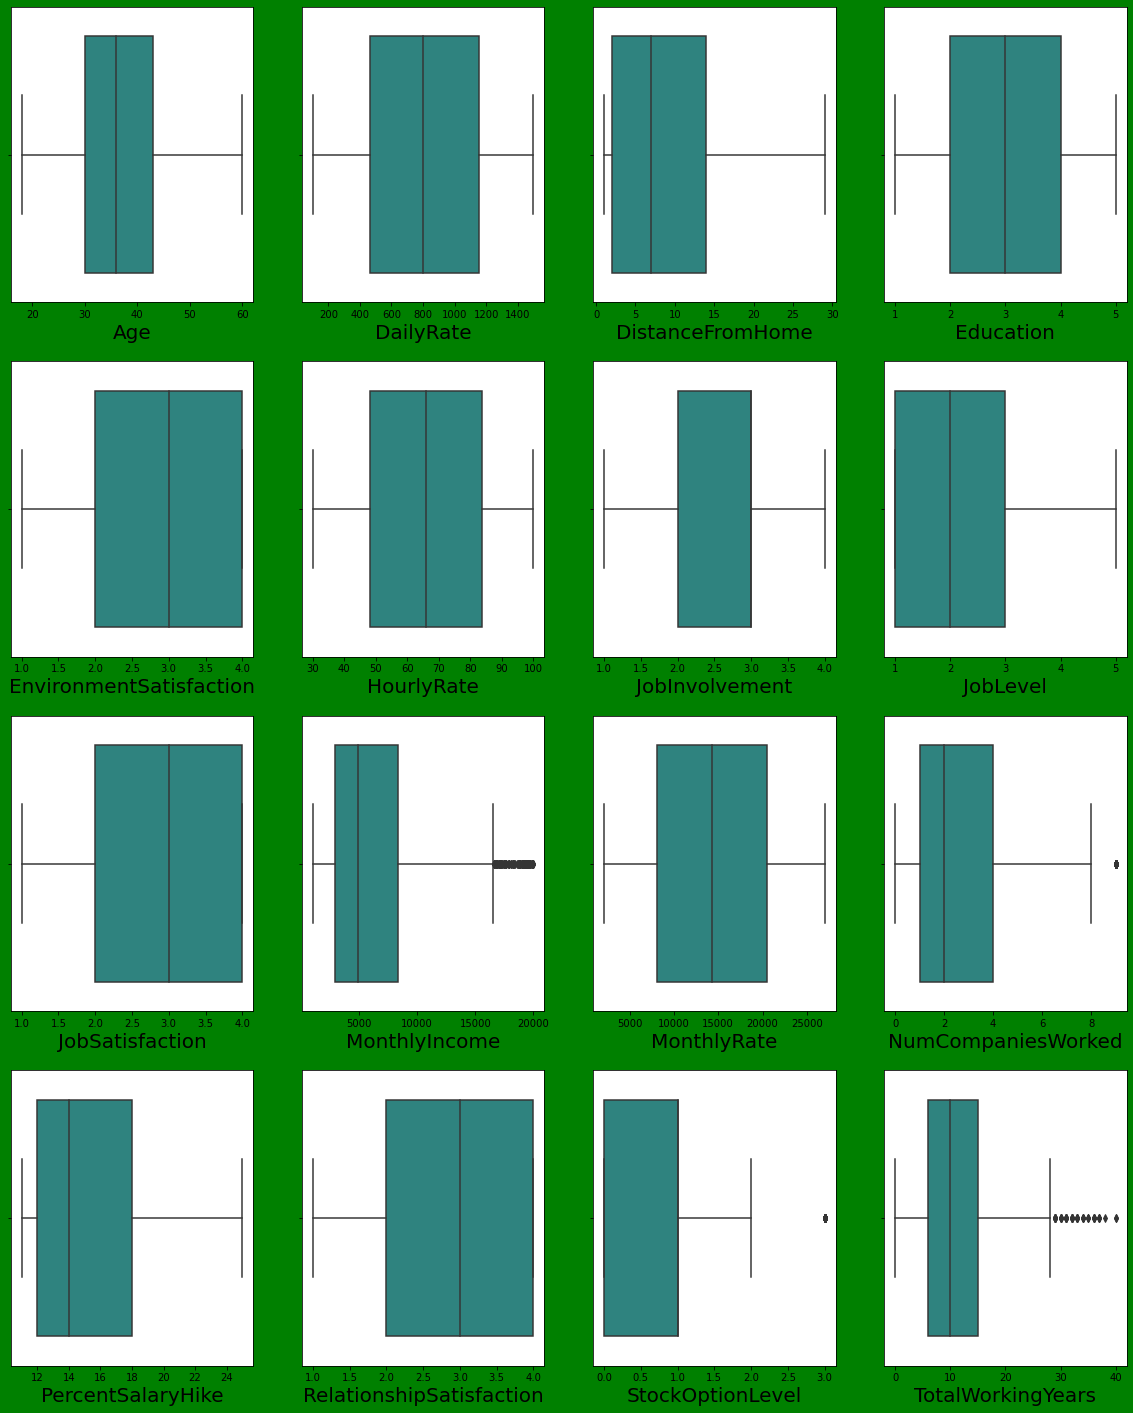

In [358]:
plt.figure(figsize=(20,25),facecolor='green')
plot_num=1
for col in X.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plot_num<=16:
        plt.subplot(4,4,plot_num)
        sns.boxplot(X[col], palette='viridis')
        plt.xlabel(col,fontsize=20)
    plot_num+=1
plt.show()

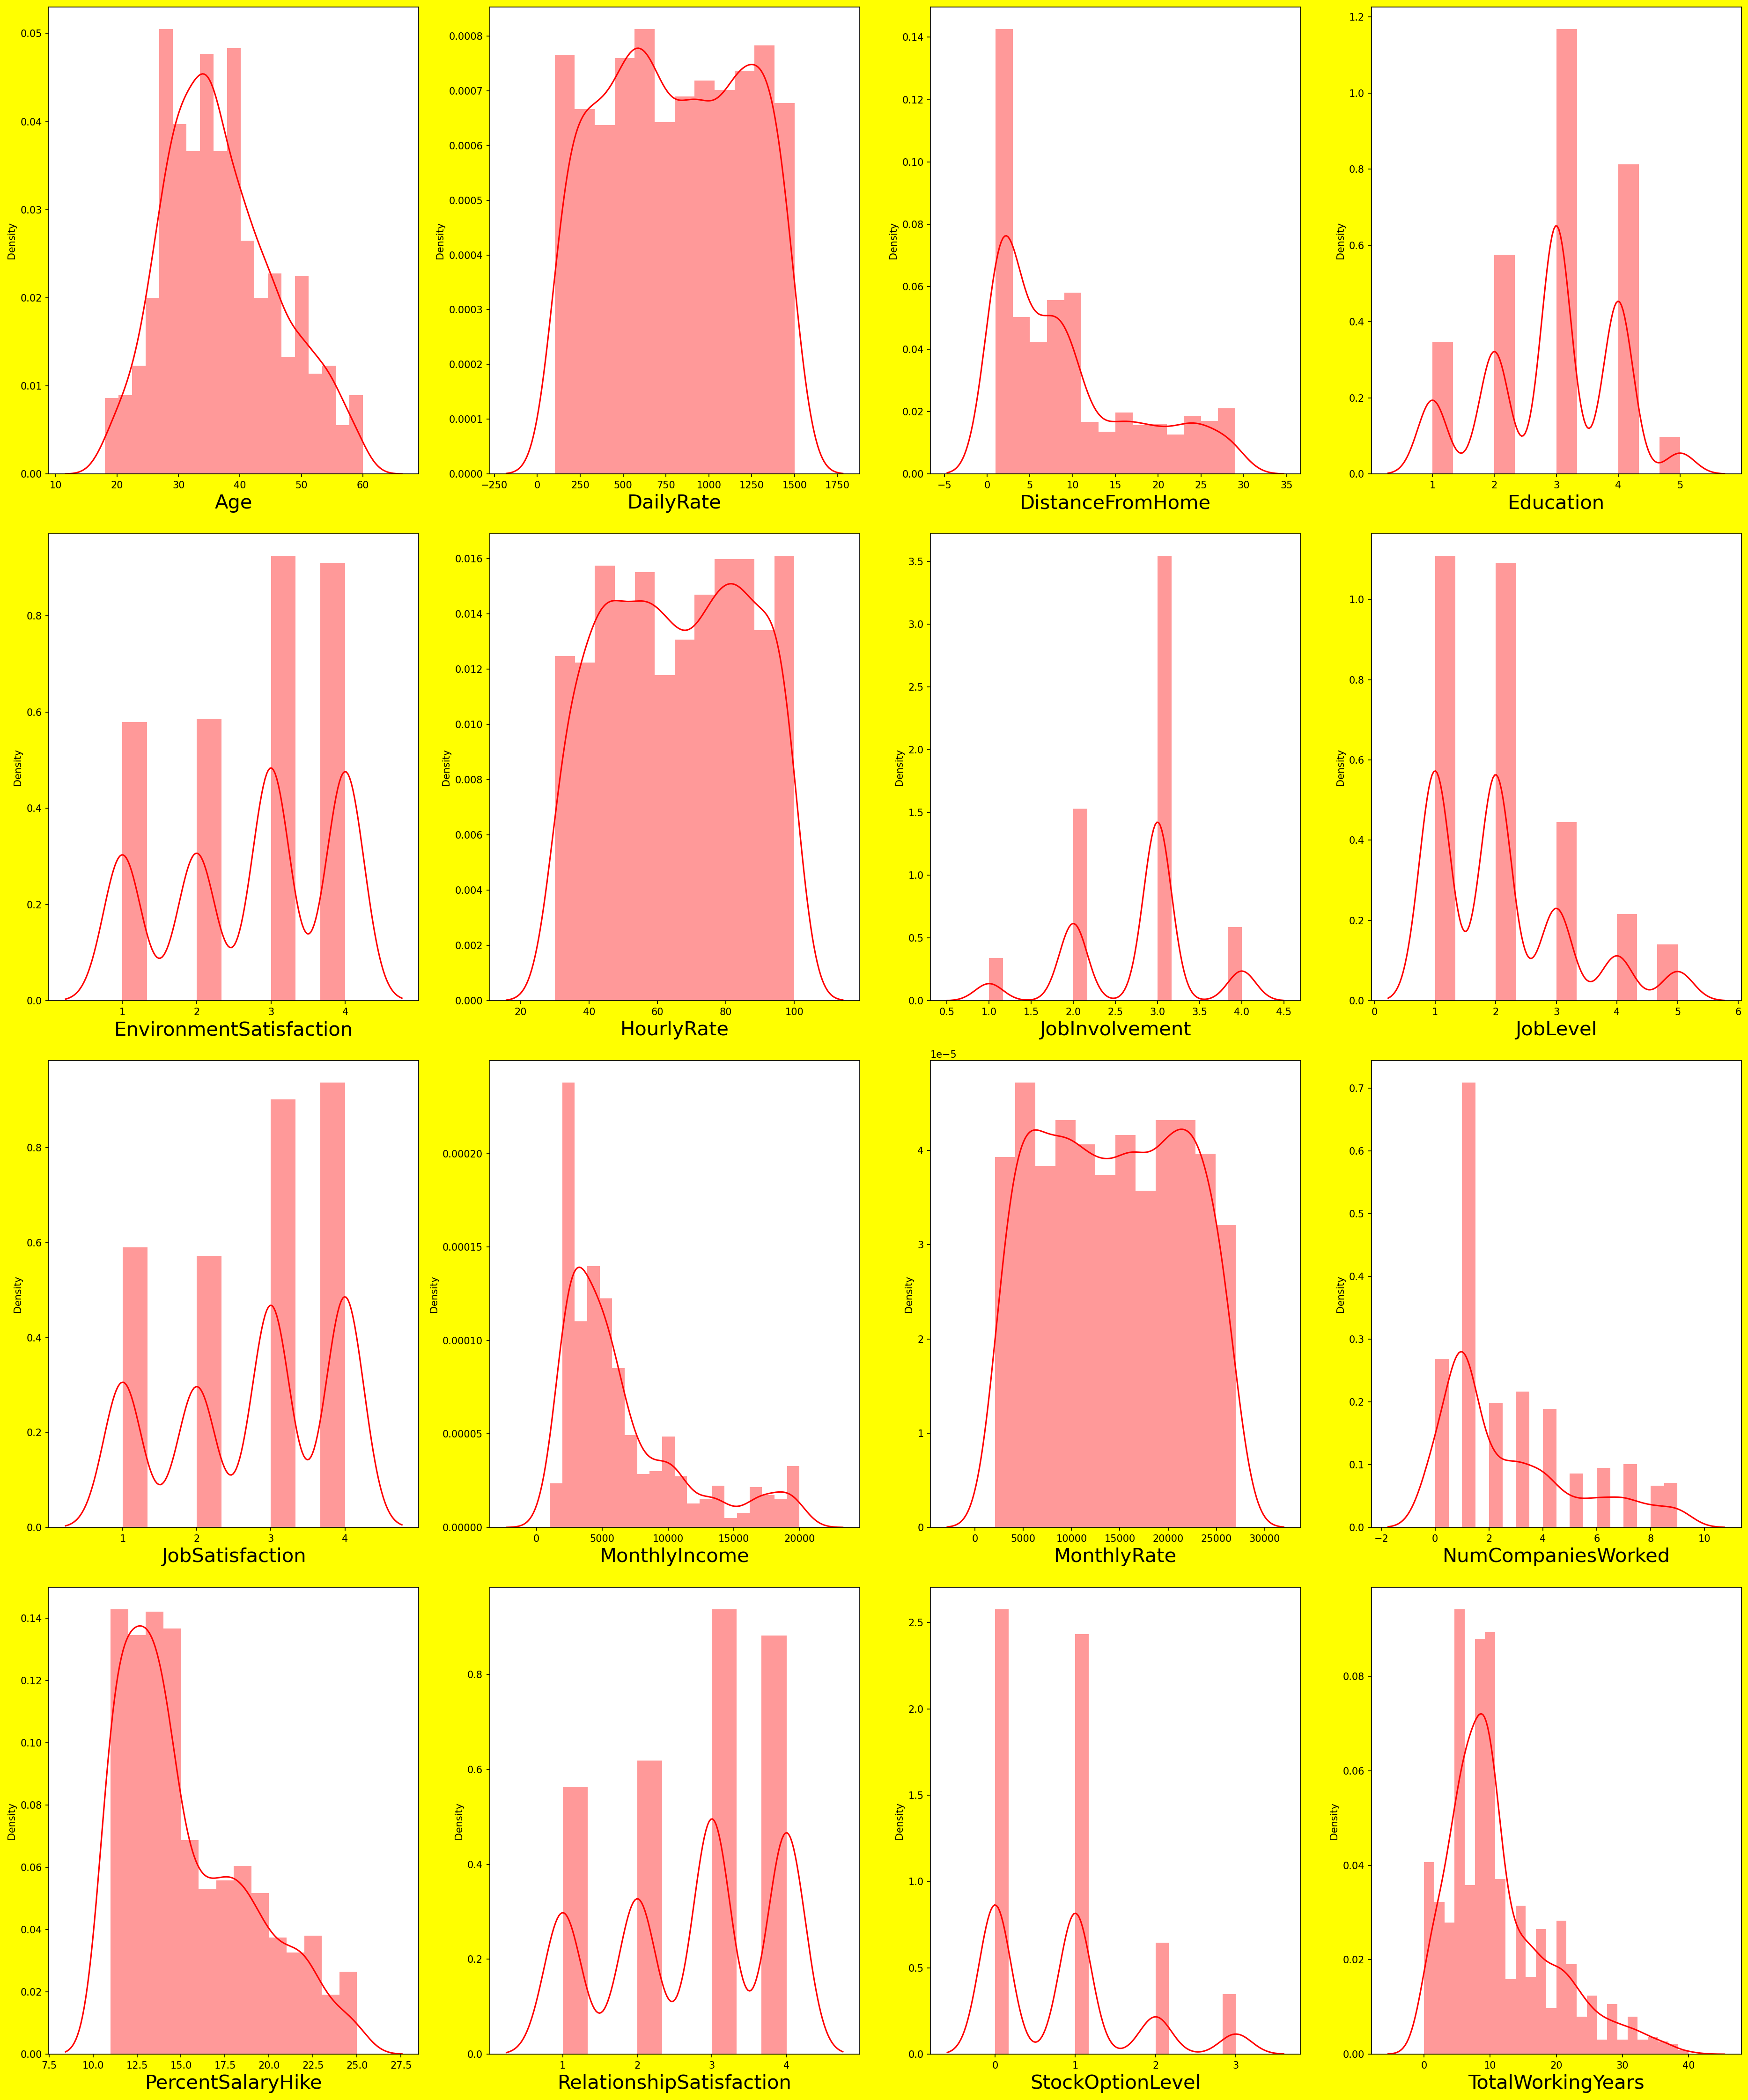

In [359]:
#Checking how data is distributed for every column.
plt.figure(figsize = (25,30),facecolor='yellow',dpi=150)

plotnumber = 1

for col in X.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[col], color = 'r')
        plt.xlabel(col, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

In [360]:
df7 =X.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']).copy()

In [576]:
#df7

# REOMOVING OUTLIERS USING IQR METHOD FOR MAX SKEWED ONE ONLY TO PREVENT HUGE DATA LOSS

# REMOVING OUTLIERS USING Z SCORE METHOD 

In [362]:
from scipy.stats import zscore
zscor = zscore(df7)
z_score_abs = np.abs(zscor)

df5 = df[(z_score_abs < 3).all(axis=1)]

In [363]:
df5.shape

(1387, 31)

In [364]:
loss=(1470-1387)/1470 * 100
print('The loss  in after removing ouliers:',loss)

The loss  in after removing ouliers: 5.646258503401361


In [365]:
#DROPPING OUTLIERS
drop_value = X.index.difference(df5.index)

In [366]:
drop_value

Int64Index([  28,   45,   62,   63,   64,   85,   98,  110,  123,  126,  153,
             178,  187,  190,  218,  231,  237,  270,  281,  326,  386,  401,
             411,  425,  427,  445,  466,  473,  477,  535,  561,  584,  592,
             595,  616,  624,  635,  653,  677,  686,  701,  716,  746,  749,
             752,  799,  838,  861,  875,  894,  914,  918,  922,  926,  937,
             956,  962,  976, 1008, 1024, 1043, 1078, 1086, 1093, 1111, 1116,
            1135, 1138, 1156, 1184, 1221, 1223, 1242, 1295, 1301, 1303, 1327,
            1331, 1348, 1351, 1401, 1414, 1430],
           dtype='int64')

In [367]:
df.drop(drop_value,inplace = True)

In [368]:
df.reset_index(drop=True,inplace = True)

In [369]:
df.shape

(1387, 31)

In [370]:
X = df.drop(columns = ['Attrition'])
y = df['Attrition']

In [371]:
X.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

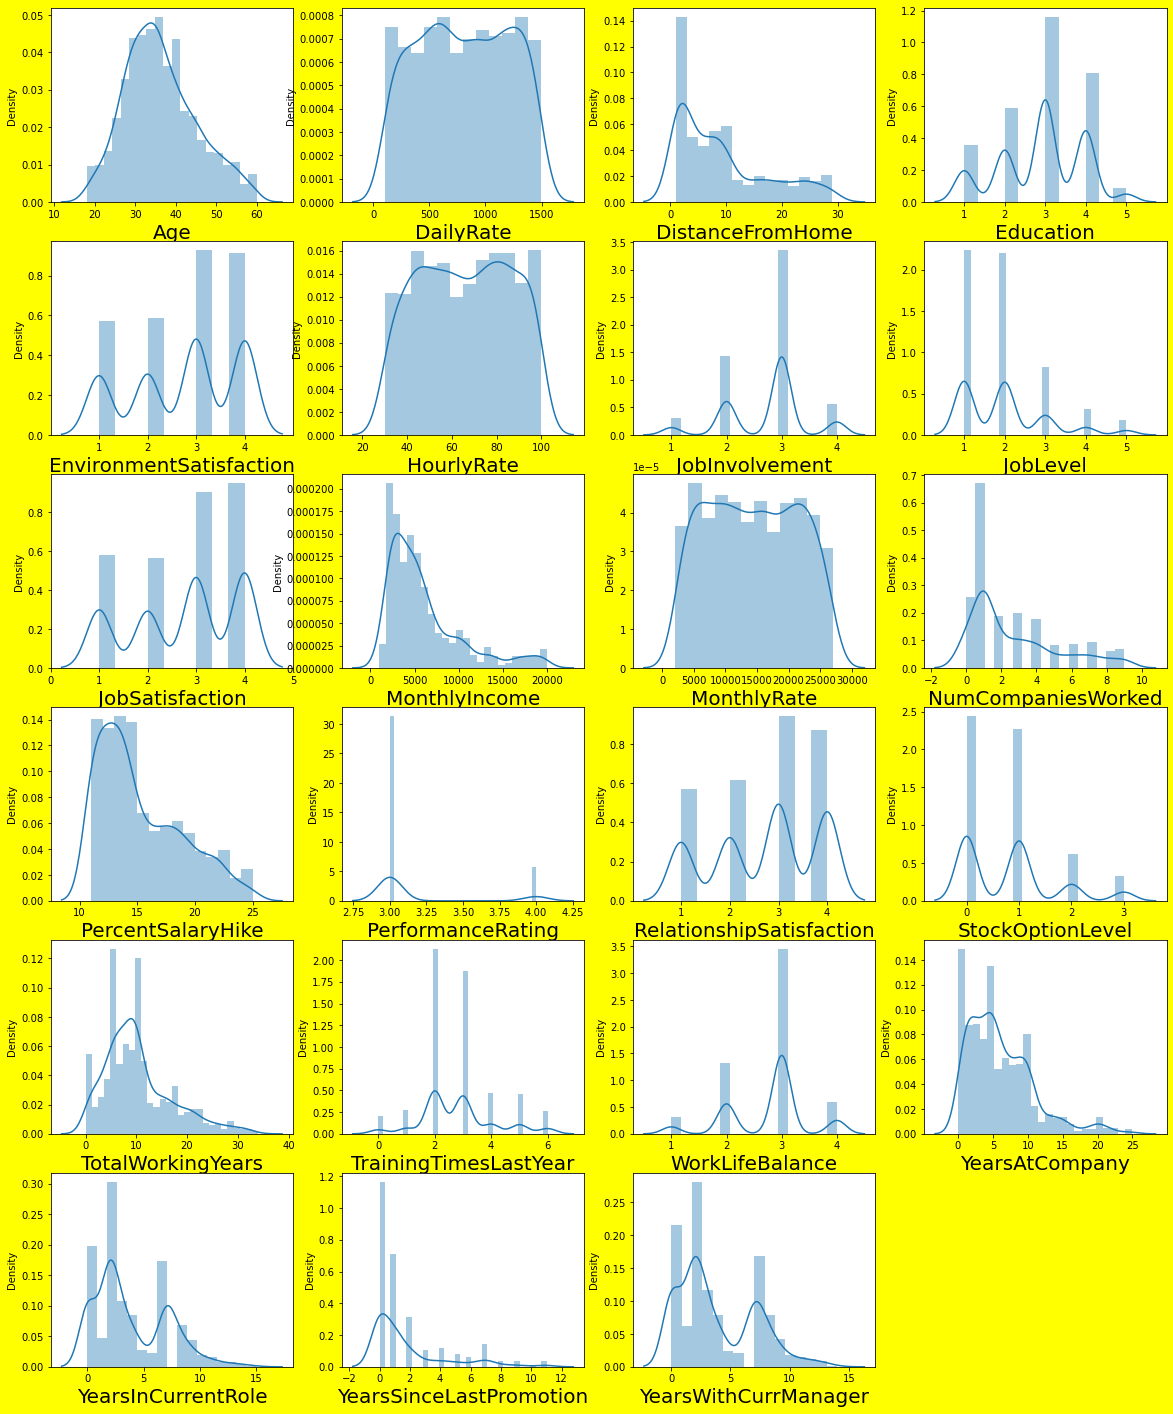

In [372]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnum=1
for col in X.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=24:
        plt.subplot(6,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Reducing skewness by using PowerTransformer

In [373]:
from sklearn.preprocessing import PowerTransformer


In [374]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [375]:
df10 = X[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']]

In [376]:
transformed= powtrans.fit_transform(df10)

In [377]:
transformed = pd.DataFrame(transformed, columns=df10.columns) 
transformed.skew()

DistanceFromHome       -0.008149
MonthlyIncome           0.027700
TotalWorkingYears      -0.009666
YearsAtCompany         -0.025230
PercentSalaryHike       0.112128
YearsWithCurrManager   -0.070570
YearsInCurrentRole     -0.069631
dtype: float64

In [ ]:
transformed.index = X.index

In [379]:
X[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']] = transformed

In [380]:
X.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     1.756335
YearsWithCurrManager       -0.070570
dtype: float64

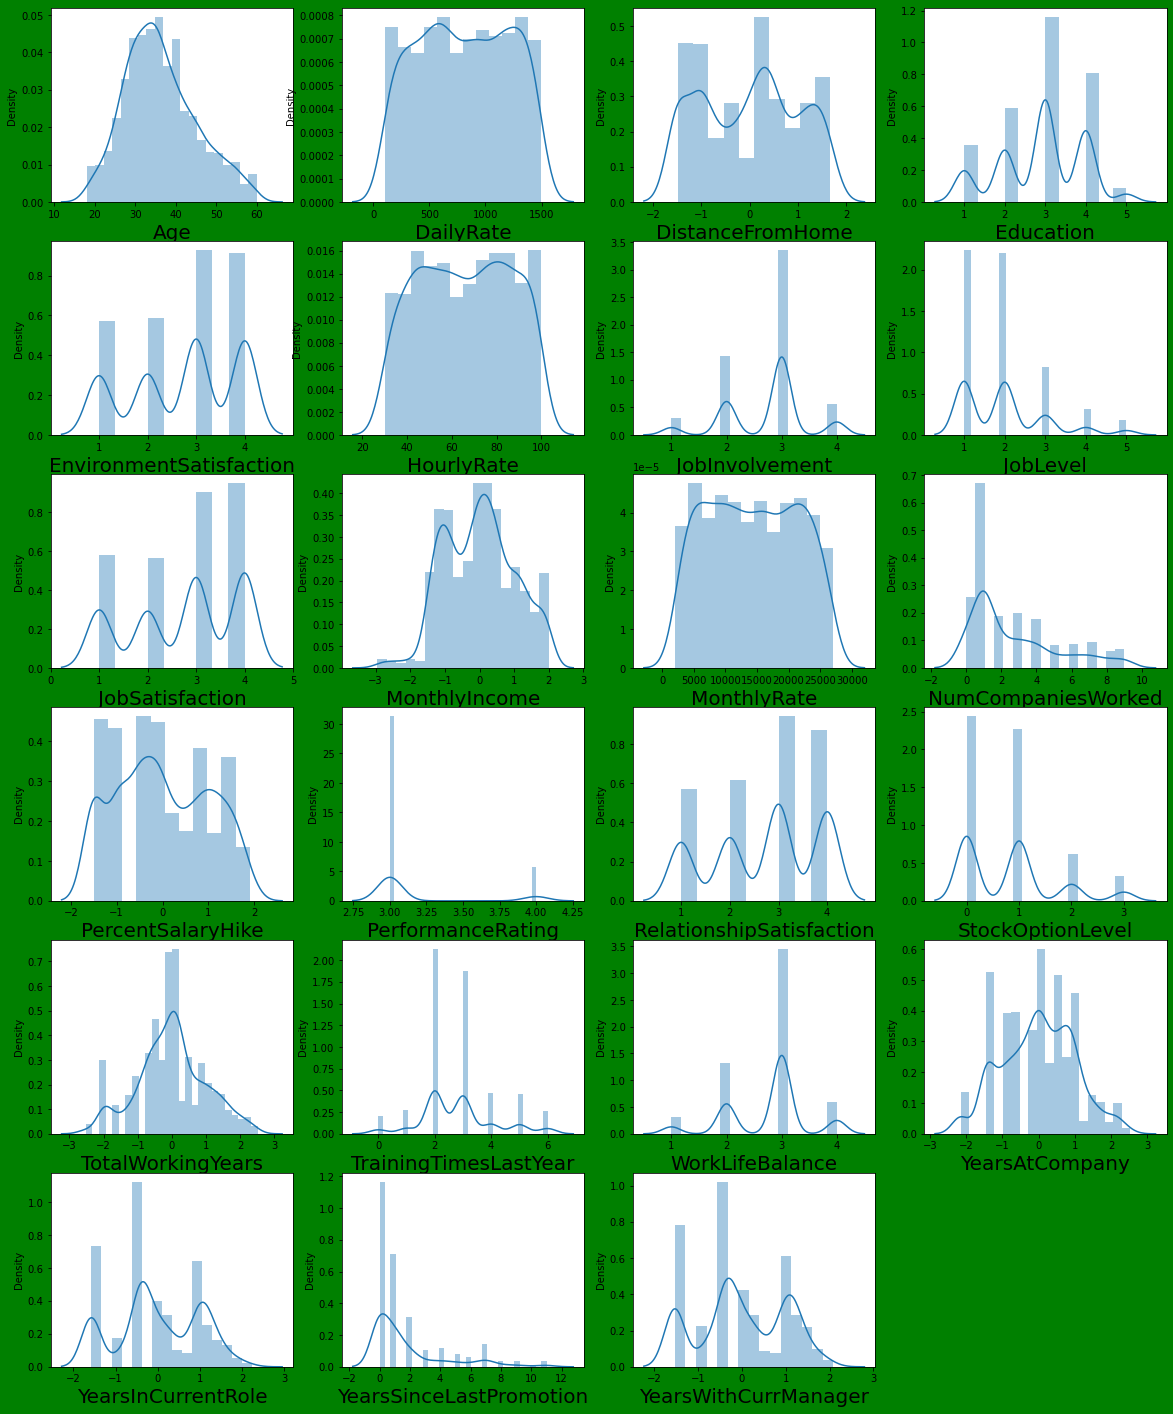

In [381]:
plt.figure(figsize=(20,25),facecolor='green')
plotnum=1
for col in X.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=24:
        plt.subplot(6,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# NOW ENCODING THE CATEGORICAL COLUMNS

In [382]:
X[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [386]:
Object = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [383]:
#Import Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [387]:
#Tranforming object data using Label Encoder
for i in Object:
    df[i] = lab_enc.fit_transform(df[i])

In [388]:
df.head()

Age Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41       Yes               2       1102           2                 1   
1   49        No               1        279           1                 8   
2   37       Yes               2       1373           1                 2   
3   33        No               1       1392           1                 3   
4   27        No               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [393]:
df['Attrition'] = df.Attrition.map({'No':0,'Yes':1}) #'No' = 1 and 'Yes' = 0

In [577]:
df.corr().head()

Age  Attrition  BusinessTravel  DailyRate  Department  \
Age             1.000000  -0.159366        0.022340   0.021946   -0.038242   
Attrition      -0.159366   1.000000       -0.001041  -0.057220    0.063637   
BusinessTravel  0.022340  -0.001041        1.000000  -0.004606   -0.003521   
DailyRate       0.021946  -0.057220       -0.004606   1.000000   -0.005398   
Department     -0.038242   0.063637       -0.003521  -0.005398    1.000000   

                DistanceFromHome  Education  EducationField  \
Age                    -0.011265   0.198502       -0.032676   
Attrition               0.081788  -0.032703        0.023585   
BusinessTravel         -0.032873  -0.010560        0.022576   
DailyRate              -0.008171  -0.018442        0.040645   
Department              0.023919   0.012846        0.013432   

                EnvironmentSatisfaction    Gender  ...  PerformanceRating  \
Age                            0.014098 -0.039430  ...          -0.000617   
Attrition                     -0.112393  0.036252  ...           0.010781   
BusinessTravel                 0.001183 -0.025364  ...          -0.018274   
DailyRate                      0.033123 -0.005242  ...           0.000574   
Department                    -0.014540 -0.030618  ...          -0.039364   

                RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Age                             0.041744          0.054506           0.636136   
Attrition                      -0.052344         -0.136676          -0.185619   
BusinessTravel                 -0.029660         -0.015159           0.029818   
DailyRate                       0.004516          0.048361           0.046173   
Department                     -0.037705         -0.003424          -0.016246   

                TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Age                         -0.019008        -0.016913        0.177620   
Attrition                   -0.057285        -0.062492       -0.166455   
BusinessTravel               0.010322        -0.014140       -0.027164   
DailyRate                    0.005861        -0.044266       -0.003580   
Department                   0.036092         0.026978        0.032583   

                YearsInCurrentRole  YearsSinceLastPromotion  \
Age                       0.121508                 0.103632   
Attrition                -0.171015                -0.029263   
BusinessTravel           -0.029257                -0.027283   
DailyRate                 0.022899                -0.043870   
Department                0.065536                 0.048931   

                YearsWithCurrManager  
Age                         0.121747  
Attrition                  -0.162297  
BusinessTravel             -0.044321  
DailyRate                  -0.011516  
Department                  0.034216  

[5 rows x 31 columns]

<AxesSubplot:>

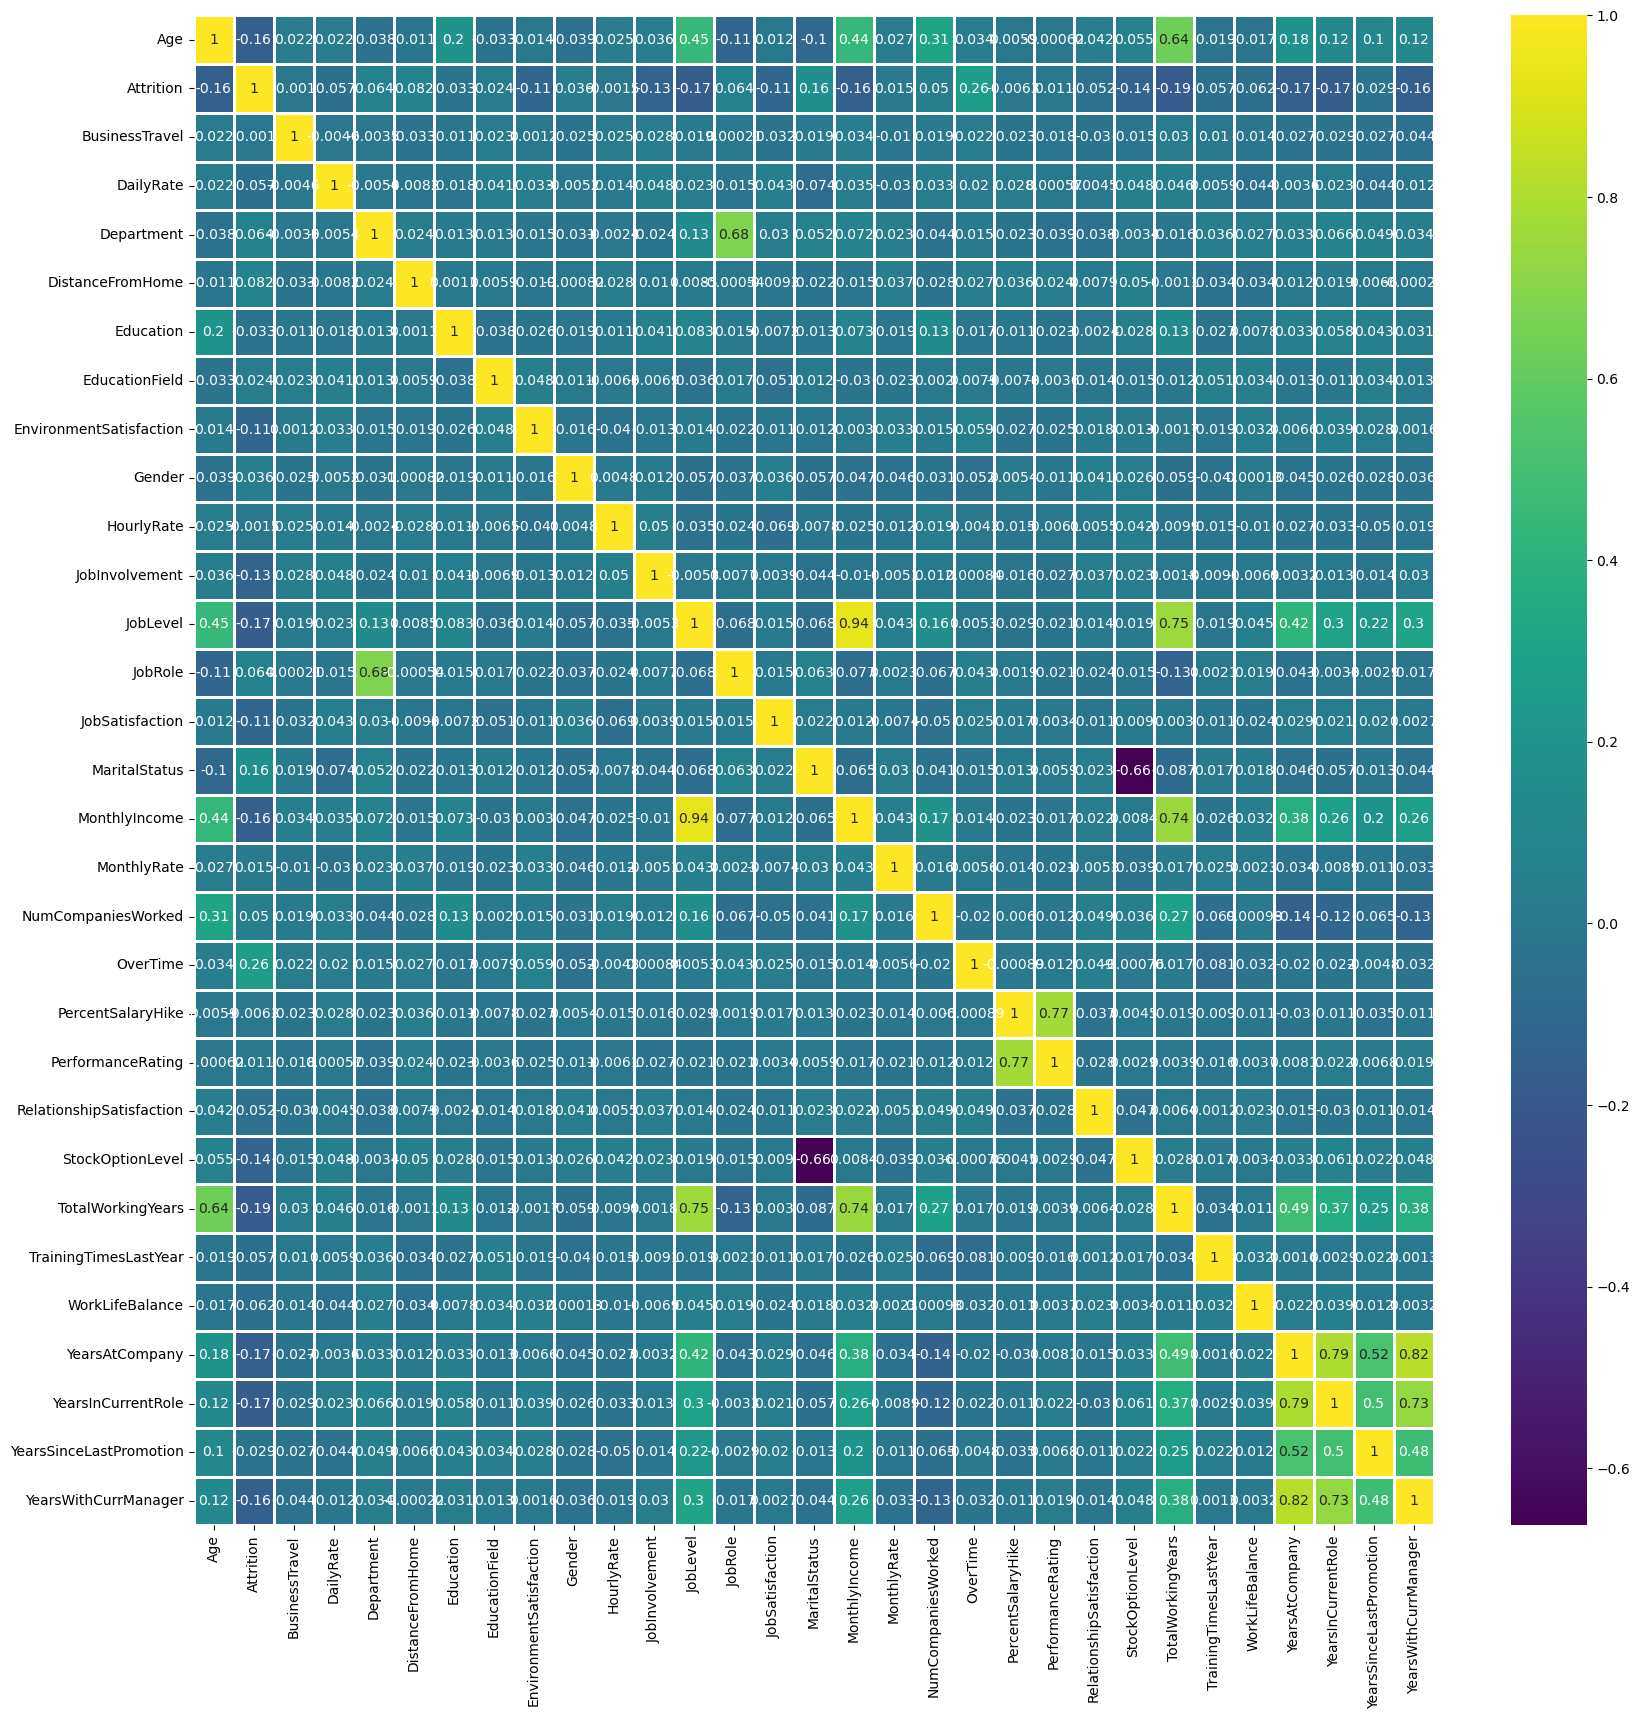

In [395]:
plt.figure(figsize=(20,20),dpi=100)
sns.heatmap(df.corr(),annot=True,linewidth=1,cmap='viridis')

# visualizing relationship between features and labels

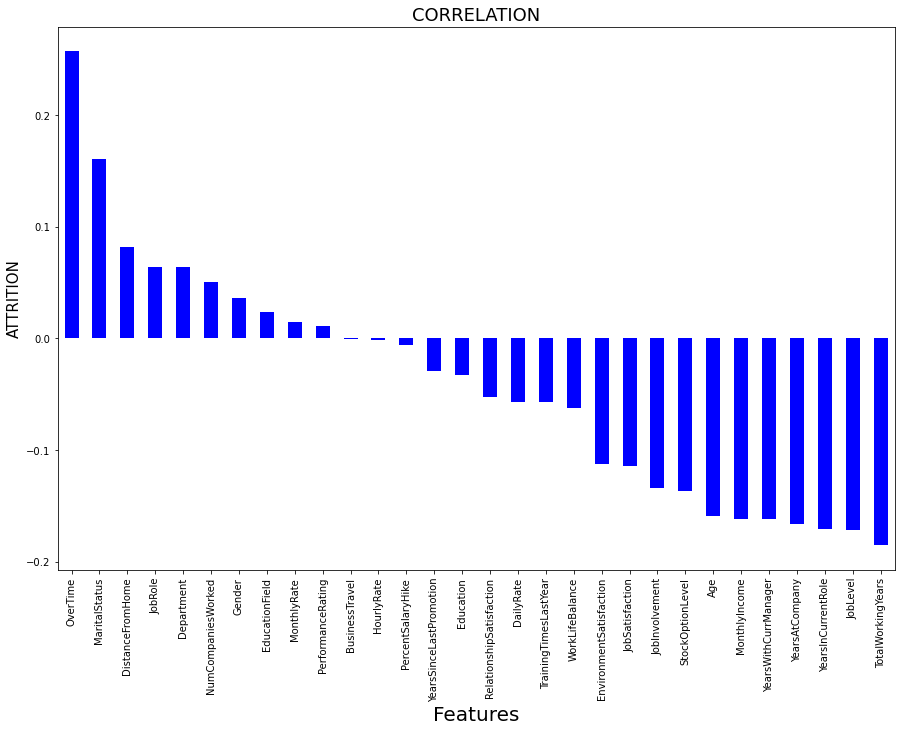

In [578]:
plt.figure(figsize = (15,10))
df.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind='bar',color = 'b')
plt.xlabel('Features',fontsize=20)
plt.ylabel('ATTRITION',fontsize=15)
plt.title('CORRELATION',fontsize = 18)
plt.show()

In [399]:
#Spliting dataset into X and Y
X = df.drop(columns = ['Attrition'])
y = df['Attrition']

# FEATURE SCALING USING STANDARD SCALER

In [579]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# USING VIF TO CHECK MULTICOLLINEARITY

In [407]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [408]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

vif['features'] = X.columns
vif

vif                  features
0    1.850568                       Age
1    1.014106            BusinessTravel
2    1.029494                 DailyRate
3    2.062034                Department
4    1.019457          DistanceFromHome
5    1.061558                 Education
6    1.021559            EducationField
7    1.021370   EnvironmentSatisfaction
8    1.023993                    Gender
9    1.022001                HourlyRate
10   1.018417            JobInvolvement
11  10.188826                  JobLevel
12   1.978117                   JobRole
13   1.022468           JobSatisfaction
14   1.838550             MaritalStatus
15   9.376741             MonthlyIncome
16   1.017026               MonthlyRate
17   1.259499        NumCompaniesWorked
18   1.028209                  OverTime
19   2.479609         PercentSalaryHike
20   2.473394         PerformanceRating
21   1.020205  RelationshipSatisfaction
22   1.821502          StockOptionLevel
23   3.887996         TotalWorkingYears
24   1.026639     TrainingTimesLastYear
25   1.018066           WorkLifeBalance
26   4.883652            YearsAtCompany
27   2.984247        YearsInCurrentRole
28   1.436720   YearsSinceLastPromotion
29   3.323766      YearsWithCurrManager

# observation
- job level and monthly income has value more than 5 which proves multicollinearity so we may remove both of them.but both
  these columns are important and contributes to the label so i choose not to drop but use dimensional reduction using 
  PCA method.

# using Principle Component Analysis

In [409]:
from sklearn.decomposition import PCA

In [411]:
pca = PCA(n_components=2)

In [412]:
principal_components = pca.fit_transform(X_scaled)

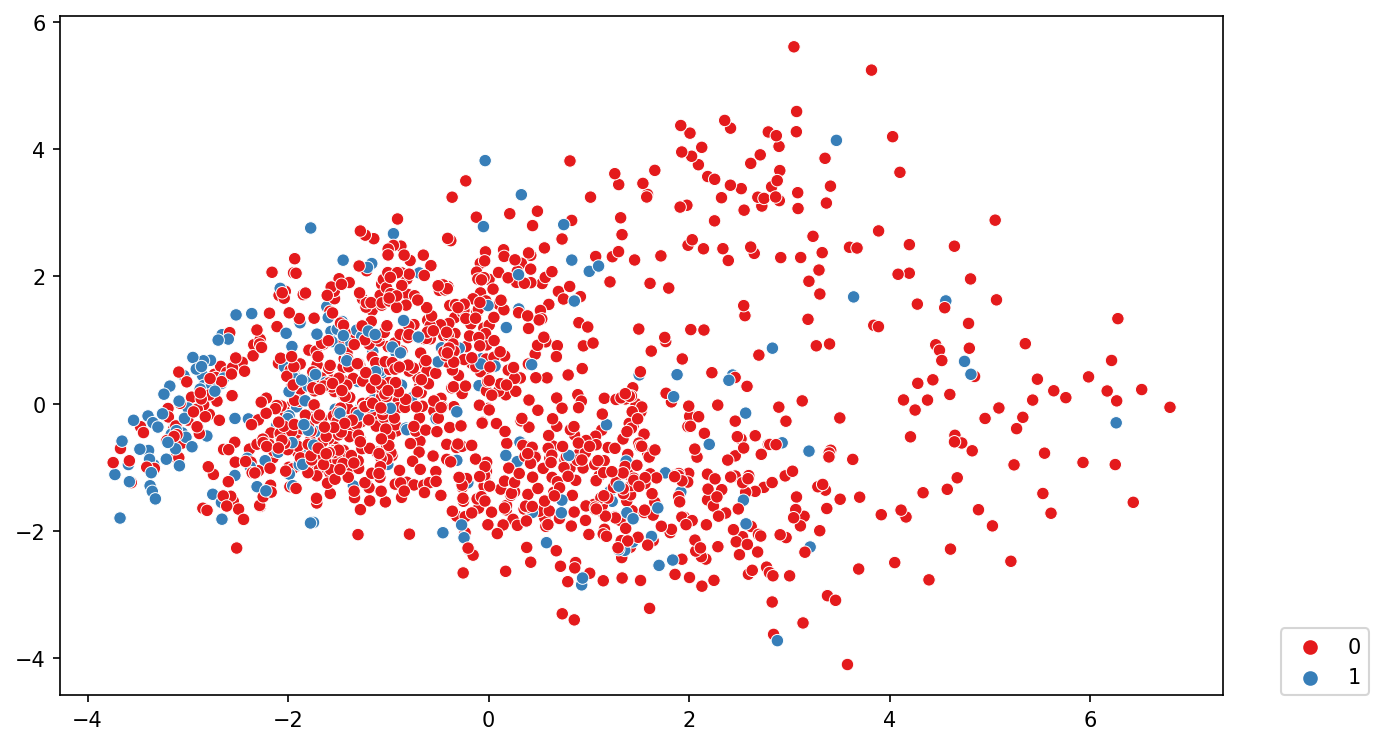

In [415]:
plt.figure(figsize=(10,6),dpi=150)
labels = df['Attrition'].values
sns.scatterplot(principal_components[:,0],principal_components[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))

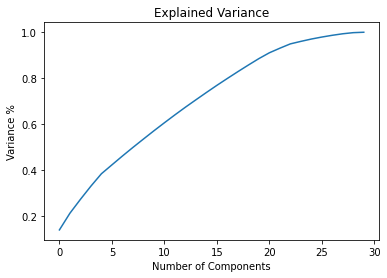

In [420]:
pca = PCA()
principle_Components = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

In [421]:
pca = PCA(n_components=28)
new_comp = pca.fit_transform(X_scaled)
best_sel=pd.DataFrame(new_comp,columns=np.arange(28))

In [580]:
best_sel.head()

0         1         2         3         4         5         6   \
0 -0.066081  0.708412 -1.992210 -1.367073  0.406752 -2.511483  1.275956   
1  0.942167 -1.010162  2.764974 -1.456442  0.123907  0.688679  0.098571   
2 -2.519634  1.398823 -0.174765 -0.150804 -1.399552  0.850434  1.146782   
3 -0.554723 -0.822108 -1.123124  0.386996 -0.446998 -0.383536  1.656396   
4 -1.793002  0.841406 -0.314986  1.151445 -1.024098  0.889495 -0.665588   

         7         8         9   ...        18        19        20        21  \
0  1.039991  0.893589  2.544398  ... -0.381036  1.352432  1.500992 -0.657347   
1 -1.140013  1.065517 -1.490969  ... -0.073841  0.411536  0.438970 -1.496196   
2  1.524415 -1.917912  0.524861  ...  0.188184 -0.307512  1.515120 -0.038420   
3  0.582805  0.247953 -0.696461  ... -0.636285 -1.310962 -0.153811  0.402807   
4 -0.492197 -0.756643 -0.382076  ... -1.350738  1.425667  2.050888  0.381466   

         22        23        24        25        26        27  
0 -0.722968  0.239073 -0.468063  0.191587 -0.327372 -0.853210  
1  1.416007  0.123105  0.552064 -0.251120  0.078966 -0.691369  
2 -0.107847  0.270029 -0.405432  0.155617  0.238548  0.083808  
3  0.320315 -0.903161  0.308540 -1.342002 -0.571529  0.335898  
4 -1.095734  0.184816 -0.462704  0.000090 -0.266566 -0.016054  

[5 rows x 28 columns]

# Feature Engineeering

In [424]:
from sklearn.feature_selection import SelectKBest, f_classif

In [427]:
best_select = SelectKBest(score_func = f_classif, k = 30)
fit = best_select.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [428]:
fit = best_select.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(30,'Score'))

                     Feature      Score
18                  OverTime  98.140453
23         TotalWorkingYears  49.422063
11                  JobLevel  42.206842
27        YearsInCurrentRole  41.726267
26            YearsAtCompany  39.467993
29      YearsWithCurrManager  37.468266
15             MonthlyIncome  37.255699
14             MaritalStatus  36.836958
0                        Age  36.092149
22          StockOptionLevel  26.364601
10            JobInvolvement  25.307350
13           JobSatisfaction  18.303387
7    EnvironmentSatisfaction  17.719366
4           DistanceFromHome   9.327110
12                   JobRole   5.747073
3                 Department   5.631654
25           WorkLifeBalance   5.429960
24     TrainingTimesLastYear   4.559904
2                  DailyRate   4.549637
21  RelationshipSatisfaction   3.805168
17        NumCompaniesWorked   3.514981
8                     Gender   1.822547
5                  Education   1.482792
28   YearsSinceLastPromotion   1.187027


In [431]:
x_best = X.drop(columns=['YearsSinceLastPromotion','BusinessTravel','HourlyRate','PercentSalaryHike','MonthlyRate'])

In [581]:
#x_best

# NOW THE TIME FOR MODEL BUILDING

In [437]:
scaled_x_best = scaler.fit_transform(x_best)

In [438]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x_best, y, test_size=0.25, random_state=101)

In [458]:
# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Decision Tree Classifier

In [440]:
clf = DecisionTreeClassifier()

In [441]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [443]:
#Model confidence/Accuracy without hyper parameter tuning
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = clf.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [445]:
#Call the function
metric_score(clf,x_train,x_test,y_train,y_test, train = True)

metric_score(clf,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 100.00%

====================================Test Result================================
Accurancy Score: 80.12%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       289
           1       0.41      0.41      0.41        58

    accuracy                           0.80       347
   macro avg       0.64      0.65      0.65       347
weighted avg       0.80      0.80      0.80       347



# Although training score is perfect ,test score is also very good but going to hypertune the model to increase the accuracy.

In [448]:
from sklearn.model_selection import GridSearchCV

In [449]:
#Let's now try to tune some hyperparameters using the GridSearchCV algorithm

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,10),
    'min_samples_split': range(3,10),
    'max_leaf_nodes': range(5,10)
}

In [450]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_param,
                          cv = 5,
                          n_jobs = -1)

In [451]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [452]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 9, 'min_samples_split': 5}


In [453]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_leaf_nodes = 9, min_samples_leaf = 2, min_samples_split = 3)

In [455]:
#Train the model with tuned parameters
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=3)

In [456]:
#Call the function
metric_score(clf,x_train,x_test,y_train,y_test, train = True)

metric_score(clf,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 87.31%

====================================Test Result================================
Accurancy Score: 86.74%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       289
           1       0.67      0.41      0.51        58

    accuracy                           0.87       347
   macro avg       0.78      0.69      0.72       347
weighted avg       0.85      0.87      0.85       347



<Figure size 1500x1500 with 0 Axes>

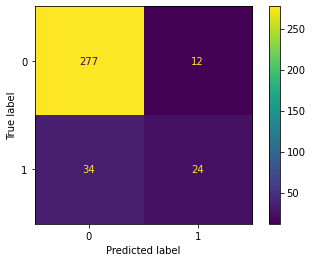

In [462]:
plt.figure(figsize=(10,10),dpi=150)
plot_confusion_matrix(clf,x_test,y_test,cmap='viridis');

# observartion
-  Accuracy scored has improved 80 percent to 86 percent ..a big jump indeed....
-  f1 scored has also improved in significant amount.

# 2. RANDOM FOREST CLASSIFIER

In [467]:
rf = RandomForestClassifier()

In [468]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [469]:
#Model Confidence/Accuracy

def metric_score(rf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = rf.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = rf.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [470]:
#Call the function and pass dataset to check train and test score.

metric_score(rf,x_train,x_test,y_train,y_test,train = True)
metric_score(rf,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 100.00%

====================================Test Result================================
Accurancy Score: 87.03%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       289
           1       0.93      0.24      0.38        58

    accuracy                           0.87       347
   macro avg       0.90      0.62      0.66       347
weighted avg       0.88      0.87      0.84       347



# Numbers are lookings really good. 100% training score 87% testing score great! Still will apply hyperparameter tuning to improve the model.

In [474]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[13,15,16],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6,7],
    'min_samples_split':[10,11],
}
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [476]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 15, min_samples_leaf = 6, min_samples_split = 11, n_estimators = 13)

In [477]:
rf = grd.best_estimator_
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=6, min_samples_split=11,
                       n_estimators=13)

In [478]:
#Call the function and pass dataset to check train and test score
metric_score(rf,x_train,x_test,y_train,y_test,train = True)
metric_score(rf,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 88.94%

====================================Test Result================================
Accurancy Score: 86.17%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       289
           1       0.86      0.21      0.33        58

    accuracy                           0.86       347
   macro avg       0.86      0.60      0.63       347
weighted avg       0.86      0.86      0.82       347



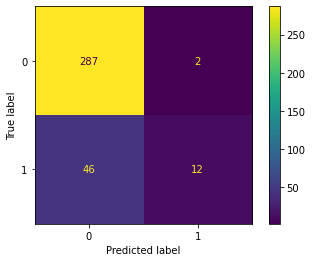

In [480]:

plot_confusion_matrix(rf,x_test,y_test,cmap='viridis');

# 3. Logistic Regression

In [481]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [482]:
lr = LogisticRegression()

In [483]:
lr.fit(x_train, y_train)

LogisticRegression()

In [484]:
#Model confidence/Accuracy without hyper parameter tuning
def metric_score(lr,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = lr.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = lr.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [485]:
#Call the function
metric_score(lr,x_train,x_test,y_train,y_test, train = True)

metric_score(lr,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 86.83%

====================================Test Result================================
Accurancy Score: 88.18%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       289
           1       0.77      0.41      0.54        58

    accuracy                           0.88       347
   macro avg       0.83      0.69      0.74       347
weighted avg       0.87      0.88      0.87       347



# Training score is 82.83% and testing score 88.18% which is good as our model train and test scores difference is not that much. Other metrics are also looking good however will apply GridSerchCV to tune the parameters and will try to improve the model.

In [486]:
#Let's now try to tune some hyperparameters using the GridSearchCV algorithm. This time I will give little higher range

param_grid_lr = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2000, 5000]
    }
]

In [487]:
grid_search_lr = GridSearchCV(estimator = lr,
                           param_grid = param_grid_lr,
                           cv = 5,
                           verbose = True,
                           n_jobs = -1)

In [488]:
best_clf = grid_search_lr.fit(x_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


In [489]:
best_clf.best_estimator_

LogisticRegression(C=0.004832930238571752, solver='liblinear')

In [492]:
lr = LogisticRegression(C=0.004832930238571752, solver='liblinear')

In [493]:
#Train the model with tuned parameters
lr.fit(x_train,y_train)

LogisticRegression(C=0.004832930238571752, solver='liblinear')

In [494]:
#Call the function
metric_score(lr,x_train,x_test,y_train,y_test, train = True)

metric_score(lr,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 86.73%

====================================Test Result================================
Accurancy Score: 87.61%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       289
           1       0.83      0.33      0.47        58

    accuracy                           0.88       347
   macro avg       0.85      0.66      0.70       347
weighted avg       0.87      0.88      0.85       347



# 4. KNeighbors Classifier

In [496]:
#Import KNeighbors Classiflier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [498]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [499]:
y_pred = knn.predict(x_test)

In [500]:
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       289
           1       0.73      0.14      0.23        58

    accuracy                           0.85       347
   macro avg       0.79      0.56      0.57       347
weighted avg       0.83      0.85      0.80       347



In [501]:
#Hyper Parameter Tuning Knn model

param_grid = {'algorithm': ['kd_tree','brute'],
             'leaf_size': [3,5,6,7,8],
             'n_neighbors': [3,5,7,9,11,13]}

In [502]:
gridsearch = GridSearchCV(estimator = knn, param_grid = param_grid)

In [503]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [504]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 5}

In [505]:
#We will use the best parameters in our K-nn algorithm and check if accuracy is increasing

knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 5)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3)

In [506]:
y_pred = knn.predict(x_test)

In [507]:
print(classification_report(y_test,y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       289
           1       0.73      0.14      0.23        58

    accuracy                           0.85       347
   macro avg       0.79      0.56      0.57       347
weighted avg       0.83      0.85      0.80       347



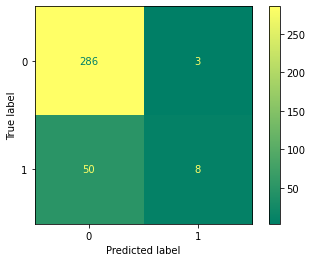

In [526]:
plot_confusion_matrix(knn,x_test,y_test,cmap='summer')

# 5. SUPPORT VECTOR CLASSIFIER

In [513]:
from sklearn.svm import SVC

In [514]:
svc = SVC(class_weight='balanced')

In [515]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [516]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [517]:
grid.best_params_

{'C': 0.001, 'gamma': 'scale'}

In [518]:
grid_pred = grid.predict(x_test)

In [519]:
confusion_matrix(y_test,grid_pred)

array([[289,   0],
       [ 58,   0]], dtype=int64)

In [520]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       289
           1       0.00      0.00      0.00        58

    accuracy                           0.83       347
   macro avg       0.42      0.50      0.45       347
weighted avg       0.69      0.83      0.76       347



# 6. XGB METHOD

In [522]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [523]:
y_pred = xgb.predict(x_test)

In [524]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       289
           1       0.82      0.40      0.53        58

    accuracy                           0.88       347
   macro avg       0.86      0.69      0.73       347
weighted avg       0.88      0.88      0.87       347



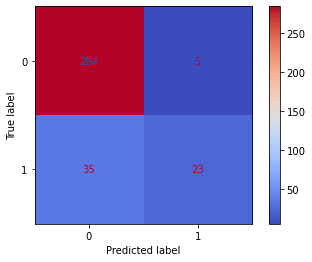

In [525]:
plot_confusion_matrix(xgb,x_test,y_test,cmap='coolwarm')

# 7. GRADIENT BOOSTING CLASSIFIER

In [528]:
from sklearn.ensemble import GradientBoostingClassifier

In [529]:
#Model Confidence/Accuracy

def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = clf.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [530]:
gbdt_clf = GradientBoostingClassifier()

In [531]:
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [532]:
#Call the function
metric_score(gbdt_clf,x_train,x_test,y_train,y_test, train = True)

metric_score(gbdt_clf,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 96.06%

====================================Test Result================================
Accurancy Score: 87.61%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       289
           1       0.78      0.36      0.49        58

    accuracy                           0.88       347
   macro avg       0.83      0.67      0.71       347
weighted avg       0.87      0.88      0.86       347



# Applying hypertuning method to improve model performance

In [533]:
grid_param = {'max_depth': range(4,8),'min_samples_split':range(2,8,2),'learning_rate':np.arange(.1,.3)}

In [534]:
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [535]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 6}

In [536]:
gbdt_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_split=6)
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=6)

In [537]:
#Call the function
metric_score(gbdt_clf,x_train,x_test,y_train,y_test, train = True)

metric_score(gbdt_clf,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 98.75%

====================================Test Result================================
Accurancy Score: 87.61%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       289
           1       0.78      0.36      0.49        58

    accuracy                           0.88       347
   macro avg       0.83      0.67      0.71       347
weighted avg       0.87      0.88      0.86       347



# Model Cross Validation

K-Fold CV

In [538]:
from sklearn.model_selection import cross_val_score as cvs

In [539]:
#Logistic Regression

print(cvs(lr,scaled_x_best,y,cv=9).mean()) 

0.8702043476237025


In [540]:
#Random Forest Classifier

print(cvs(rf,scaled_x_best,y,cv=9).mean())

0.8572545733836058


In [541]:
#Decision Tree Classifier

print(cvs(clf,scaled_x_best,y,cv=9).mean())

0.847167527812689


In [542]:
#KNeighbors Classifier

print(cvs(knn,scaled_x_best,y,cv=9).mean())

0.8457059069962295


In [548]:
#SUPPORT VECTOR CLASSIFIER

print(cvs(svc,scaled_x_best,y,cv=9).mean())

0.8182888795792022


In [549]:
#XGB METHOD

print(cvs(xgb,scaled_x_best,y,cv=9).mean())

0.8608527673043801


In [545]:
#GRADIENT BOOSTING CLASSIFIER

print(cvs(gbdt_clf,scaled_x_best,y,cv=9).mean())

0.8579667644183773


# plot ROC AUC curve to choose the best model

In [550]:
#Training with all classifier.
clf.fit(x_train,y_train)
rf.fit(x_train,y_train)
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
gbdt_clf.fit(x_train,y_train)
xgb.fit(x_train,y_train)
grid.fit(x_train,y_train)


print('All models have been trained')

All models have been trained


In [551]:
#Capturing scores for all the models.
clf.score(x_test,y_test)
rf.score(x_test,y_test)
lr.score(x_test,y_test)
knn.score(x_test,y_test)
gbdt_clf.fit(x_test,y_test)
xgb.fit(x_test,y_test)
grid.fit(x_test,y_test)


print('All models test scores have been captured')

All models test scores have been captured


# Next will check ROC AUC curve for the fitted model

In [553]:
from sklearn.metrics import plot_roc_curve

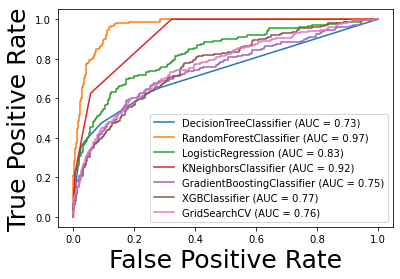

In [556]:
#Let's see how well our model works on training data.
disp = plot_roc_curve(clf,x_train,y_train)

plot_roc_curve(rf, x_train, y_train, ax = disp.ax_)

plot_roc_curve(lr, x_train, y_train, ax = disp.ax_)

plot_roc_curve(knn, x_train, y_train, ax = disp.ax_)

plot_roc_curve(gbdt_clf, x_train, y_train, ax = disp.ax_)

plot_roc_curve(xgb, x_train, y_train, ax = disp.ax_)

plot_roc_curve(grid, x_train, y_train, ax = disp.ax_)

plt.legend(prop = {'size': 10}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 25)

plt.ylabel("True Positive Rate", fontsize = 25)

plt.show()

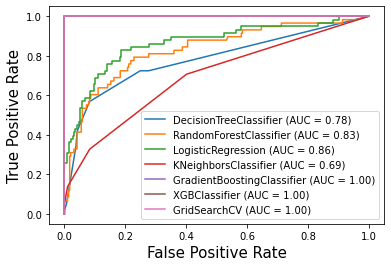

In [557]:
#Let's see how well our model works on testing data.
disp = plot_roc_curve(clf,x_test,y_test)

plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)

plot_roc_curve(lr, x_test, y_test, ax = disp.ax_)

plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)

plot_roc_curve(gbdt_clf, x_test, y_test, ax = disp.ax_)

plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)

plot_roc_curve(grid, x_test, y_test, ax = disp.ax_)


plt.legend(prop = {'size': 10}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()


# from the above result we observe that many models have cross the accuracy rate of 85%,but the best model is logistic regression as accuracy rate and cross valiadtion has almost same or the difference between accuracy rate and cross validation of logistic model is least.so the best model which i save is LOGISTIC MODEL.

# BEFORE SAVING LETS ONCE TUNE LOGISTIC MODEL WITH MORE PARAMETERS

In [560]:
#Logistic Regression hypertune

parameter = {'C':[0.001,0.01,0.1,0,1,1.1],
             'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'dual': [True,False],
             'fit_intercept':[True,False],
             'random_state':[1,2,3,5,10,20,45],
             'solver':['liblinear'],
             'max_iter':[100,200,300,400,500],
             'multi_class':['auto', 'ovr', 'multinomial']}

In [561]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=7,n_jobs = -1,verbose=2)

In [562]:
GridCV.fit(x_train,y_train)

Fitting 7 folds for each of 10080 candidates, totalling 70560 fits


GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0, 1, 1.1],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300, 400, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 3, 5, 10, 20, 45],
                         'solver': ['liblinear']},
             verbose=2)

In [563]:
GridCV.best_params_

{'C': 0.001,
 'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [564]:
Best_model = LogisticRegression(C = 0.001,dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_model.fit(x_train,y_train)
log_reg = Best_model.predict(x_test)
acc = accuracy_score(y_test,log_reg)
print(acc*100)

87.60806916426513


# Although no improvement happened but the scope was very less as all testing has been done before .

# saving the best model

In [565]:
import joblib
joblib.dump(Best_model,"BestModelHR_analytics.pkl")

['BestModelHR_analytics.pkl']

In [566]:
a = np.array(y_test)
predicted = np.array(Best_model.predict(x_test))
hr_model = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
hr_model

Original  Predicted
0           0          0
1           0          0
2           0          0
3           0          1
4           0          0
..        ...        ...
342         1          1
343         0          0
344         0          0
345         0          0
346         0          0

[347 rows x 2 columns]

Text(0.5, 1.0, 'Original vs predicted  graph')

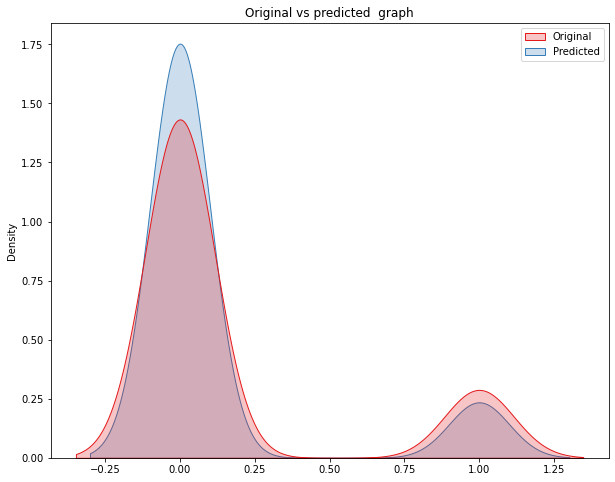

In [583]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=hr_model, palette='Set1',gridsize=500, shade=True)
plt.title('Original vs predicted  graph')

# thus we see that there is very close gap between original and predicted result,thus model has been successfully completed

# ==========================THANKYOU=========================